In [ ]:
import numpy as np   #for mathematical calculations
import pandas as pd  #for reading data sets and doing operations on it
import matplotlib.pyplot as plt   #for visualisation
import seaborn as sns           #for visualisation
import math 
import tqdm
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [ ]:
from google.colab import drive  #mounting drive to colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/FoDS-A1.csv")  #reading dataset

In [ ]:
data.head()              #prints first five elements of data set

Strength  Temperature  Pressure
0      30.7          240        16
1      24.7          250        18
2      30.6          260        16
3      32.8          240        10
4      20.7          240        20

In [ ]:
data.tail()          #prints last five elements of data set

Strength  Temperature  Pressure
1645      32.5          270        20
1646      38.6          290        14
1647      39.7          290        12
1648      14.6          200        20
1649      19.8          210        20

In [ ]:
data.info()             #gives information about all columns in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strength     1650 non-null   float64
 1   Temperature  1650 non-null   int64  
 2   Pressure     1650 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 38.8 KB


In [ ]:
data.describe()          #gives description about few mathematical metrics involved in our data

Strength  Temperature     Pressure
count  1650.000000  1650.000000  1650.000000
mean     30.000000   250.000000    15.000000
std       7.390248    31.632364     3.416686
min      12.400000   200.000000    10.000000
25%      24.400000   220.000000    12.000000
50%      30.200000   250.000000    15.000000
75%      35.700000   280.000000    18.000000
max      48.700000   300.000000    20.000000

In [ ]:
data.corr()  #correlation of different columns with each other

Strength  Temperature  Pressure
Strength     1.000000     0.856057 -0.462324
Temperature  0.856057     1.000000  0.000000
Pressure    -0.462324     0.000000  1.000000

Now Let us do some Basic Data Visualisation of the data which we have!


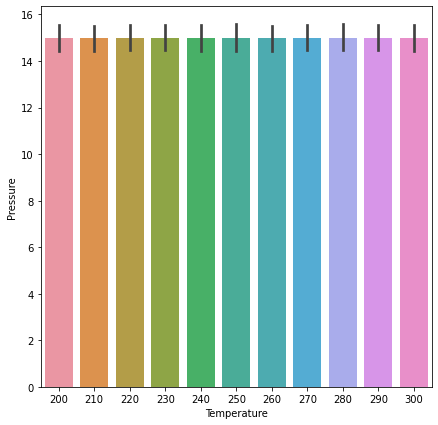

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x="Temperature",y="Pressure",data=data)

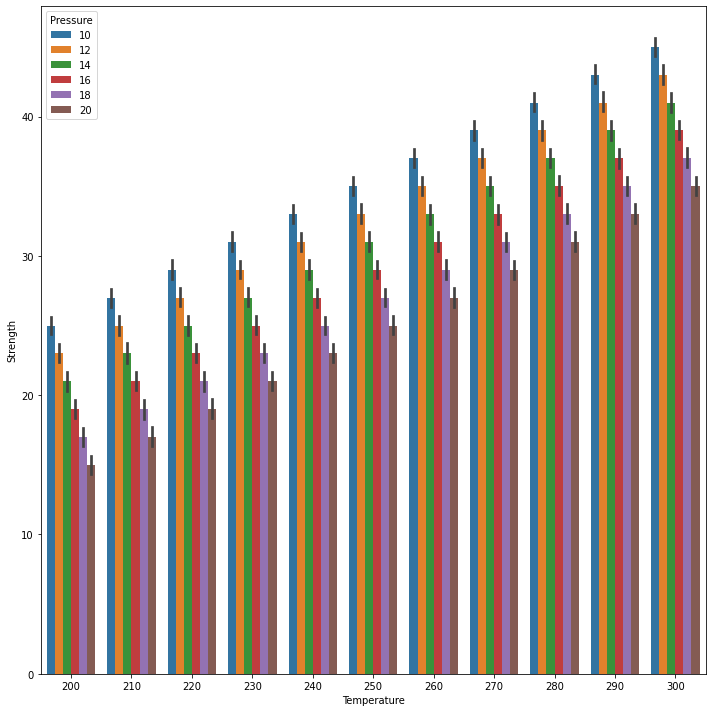

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="Temperature",y="Strength",data=data,hue='Pressure')

plt.tight_layout()

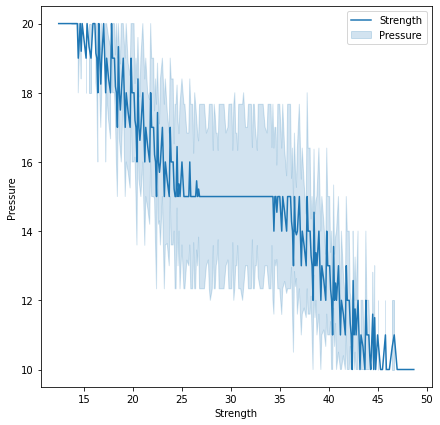

In [ ]:
plt.figure(figsize=(7,7))
sns.lineplot(x="Strength",y="Pressure",data=data)
plt.legend(["Strength","Pressure"])
plt.show()

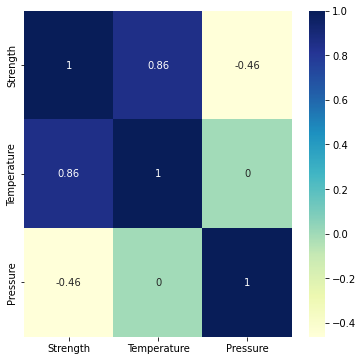

In [ ]:
plt.figure(figsize=(6,6))
plt.tight_layout()
sns.heatmap(data=data.corr(),cmap="YlGnBu",annot=True)


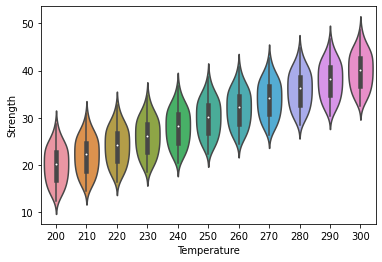

In [ ]:
sns.violinplot(x="Temperature",y="Strength",data=data)

In [ ]:
print(data)

      Strength  Temperature  Pressure
0         30.7          240        16
1         24.7          250        18
2         30.6          260        16
3         32.8          240        10
4         20.7          240        20
...        ...          ...       ...
1645      32.5          270        20
1646      38.6          290        14
1647      39.7          290        12
1648      14.6          200        20
1649      19.8          210        20

[1650 rows x 3 columns]


In [ ]:
data_d=data
train_data=data_d.sample(frac=0.7,random_state=101)  #taking 70% of total data which is 0.7*1650=1155 rows for training
test_data=data_d.drop(train_data.index)              #remaining 30% goes for testing   #reading dataset

In [ ]:
train_data

Strength  Temperature  Pressure
1339      29.0          230        14
137       28.5          250        18
683       28.5          260        20
1203      36.8          260        10
758       38.3          300        16
...        ...          ...       ...
364       26.5          230        16
1182      32.2          270        16
550       24.5          220        16
616       38.4          290        12
1441      44.2          290        10

[1155 rows x 3 columns]

In [ ]:
test_data

Strength  Temperature  Pressure
1         24.7          250        18
3         32.8          240        10
5         34.5          260        16
10        30.7          250        14
11        40.6          280        10
...        ...          ...       ...
1640      30.1          250        16
1644      28.6          240        14
1645      32.5          270        20
1646      38.6          290        14
1649      19.8          210        20

[495 rows x 3 columns]

In [ ]:
#notations tr for training data ts for testing data s for standardized data n for normalized data
x1_tr=train_data.iloc[:,1].values #temp vector of training data

#print(temp)

x2_tr=train_data.iloc[:,0].values #strength vector of training data

y_tr=train_data.iloc[:,2].values #pressure vector of training data

mean_x1_tr=x1_tr.mean()

mean_x2_tr=x2_tr.mean()

std_x1_tr=x1_tr.std()

std_x2_tr=x2_tr.std()

print('mean of x1 and x2 in training data is '+str(mean_x1_tr)+'  '+str(mean_x2_tr))

print('standard deviation of x1 and x2 in training data is '+str(std_x1_tr)+' '+str(std_x2_tr))

#now creating standardized values for x1 and x2
x1_s_tr=(x1_tr-mean_x1_tr)/std_x1_tr
x2_s_tr=(x2_tr-mean_x2_tr)/std_x2_tr


#now normalizing x1 and x2
min_x1_tr=x1_tr.min()
min_x2_tr=x2_tr.min()
max_x1_tr=x1_tr.max()
max_x2_tr=x2_tr.max()
#normalized vectors for x1 and x2 are taken as x1n and x2n respectively
cd_x1_tr=max_x1_tr-min_x1_tr
cd_x2_tr=max_x2_tr-min_x2_tr
x1_n_tr=(x1_tr-min_x1_tr)/cd_x1_tr
x2_n_tr=(x2_tr-min_x2_tr)/cd_x2_tr

#now creating standardised and normalised vectors for y
min_y_tr=y_tr.min()
max_y_tr=y_tr.max()
std_y_tr=y_tr.std()
cd_y_tr=max_y_tr-min_y_tr
y_n_tr=(y_tr-min_y_tr)/cd_y_tr
mean_y_tr=y_tr.mean()
y_s_tr=(y_tr-mean_y_tr)/std_y_tr

#print(y_s_tr)
#print('\n')
#print(x1_n_tr)
#print('\n')
#print(x2_n_tr)
#print('\n')

#now doing the same thing for testing data
#notations ts for testing data s for standardized data n for normalized data
x1_ts=test_data.iloc[:,1].values #temp vector of testing data

#print(temp)

x2_ts=test_data.iloc[:,0].values #strength vector of testing data

y_ts=test_data.iloc[:,2].values #pressure vector of testing data

mean_x1_ts=x1_ts.mean()

mean_x2_ts=x2_ts.mean()

std_x1_ts=x1_ts.std()

std_x2_ts=x2_ts.std()

print('mean of x1 and x2 in testing data is '+str(mean_x1_ts)+'  '+str(mean_x2_ts))

print('standard deviation of x1 and x2 in testing data is '+str(std_x1_ts)+' '+str(std_x2_ts))

#now creating standardized values for x1 and x2
x1_s_ts=(x1_ts-mean_x1_ts)/std_x1_ts
x2_s_ts=(x2_ts-mean_x2_ts)/std_x2_ts

#now normalizing x1 and x2
min_x1_ts=x1_ts.min()
min_x2_ts=x2_ts.min()
max_x1_ts=x1_ts.max()
max_x2_ts=x2_ts.max()
#normalized vectors for x1 and x2 are taken as x1n and x2n respectively
cd_x1_ts=max_x1_ts-min_x1_ts
cd_x2_ts=max_x2_ts-min_x2_ts
x1_n_ts=(x1_ts-min_x1_ts)/cd_x1_ts
x2_n_ts=(x2_ts-min_x2_ts)/cd_x2_ts

#now creating standardised and normalised vectors for y
min_y_ts=y_ts.min()
max_y_ts=y_ts.max()
std_y_ts=y_ts.std()
cd_y_ts=max_y_ts-min_y_ts
y_n_ts=(y_ts-min_y_ts)/cd_y_ts
mean_y_ts=y_ts.mean()
y_s_ts=(y_ts-mean_y_ts)/std_y_ts

#print(y_s_ts)
#print('\n')
#print(x1_n_ts)
#print('\n')
#print(x2_n_ts)
#print('\n')

mean of x1 and x2 in training data is 249.2034632034632  29.857922077922073
standard deviation of x1 and x2 in training data is 31.428709765595393 7.407737560741466
mean of x1 and x2 in testing data is 251.85858585858585  30.331515151515152
standard deviation of x1 and x2 in testing data is 31.9940051521683 7.3310669174930005


A)
The dataset consists of two features i.e. ‘Strength’ and ‘Temperature’ applied to a certain 
piece of plastic. Using the features, you are expected to predict how much ‘Pressure’ that 
the plastic can stand by constructing matured polynomial features and optimizing the 
weights by using GD and SGD without any regularization. Do the same for degrees 0, 1, 
2, 3, 4, 5, 6, 7, 8, 9. Determine the which degree polynomial provides the best fit to the 
data.

In [ ]:
finlist=[] #this lists of list contains various powers of x for different order polynomials
templist=[] #used for storing current modified state


for x in range(0,10):
    for i in range(x+1):
        for j in range(x+1):
            if i+j<=x:
                f=[j,i]
                templist.append(f)
    finlist.append(templist)
    templist=[]


#finlist[0:9] contains all possible powers for x
#now gradient desent starts
#for degree zero we have fixed y

#degree zero
#as data is standardised it is equal to zero 
w0=y_s_tr.mean()
print('The coeffiecent value for GDA done on degree zero polynomial is W0= ',w0)

#now doing the GDA for degree 1 to 9
omegas=[]
for x in range(1,10): #degree of polynomial being made
    u=round(((x+1)+(x+1)*(x+1))/2)
    #print(u)
    #print('\n')
    t=0
    arr=np.array(finlist[x]).reshape(u,2)
    #print(arr)
    wk=np.zeros([u,1])
    
    #initial values taken as 0.1
    for i in range(0,u):
        wk[i]=0.1
    lr=0.0001 #this is neta value or learning rate

    #now GDA begins creating error matrix to minimize
    #print(wk)
    print('entering loop ')
    e_arr=np.zeros([u,1])
    for h in range(1000):#no of iterations necessary
        for i in range(0,u):
            ansf=np.zeros([1,x1_s_tr.size])
            for j in range(0,u):
                x1_c=arr[j][0]
                x2_c=arr[j][1]
                #print('x1 count in j= '+str(j)+' is '+str(x1_c))
                #print('x2 count in j= '+str(j)+' is '+str(x2_c))
                temp_x1=np.ones([1,x1_s_tr.size])
                temp_x2=np.ones([1,x2_s_tr.size])
                for k in range(x1_c):
                    temp_x1=np.multiply(temp_x1,x1_s_tr)                
                for k in range(x2_c):
                    temp_x2=np.multiply(temp_x2,x2_s_tr)
                ans=np.multiply(temp_x1,temp_x2)
                ans=np.multiply(ans,wk[j])
                #print('now printing ans'+'\n',ans)
                #print(temp_x1)
                #print(temp_x2)
                #print('\n')
                ansf+=ans
                #print('i= '+str(i))
                #print('j= '+str(j)+' '+str(e_arr[i]))
            ansf=ansf-y_s_tr
            x1_c=arr[i][0]
            x2_c=arr[i][1]
            temp_x1=np.ones([1,x1_s_tr.size])
            temp_x2=np.ones([1,x2_s_tr.size])
            for k in range(x1_c):
                temp_x1=np.multiply(temp_x1,x1_s_tr)                
            for k in range(x2_c):
                temp_x2=np.multiply(temp_x2,x2_s_tr)
            ansf=np.multiply(ansf,temp_x1)
            ansf=np.multiply(ansf,temp_x2)
            ansf=np.multiply(lr,ansf)
            #print(ansf)
            e_arr[i]=lr*(ansf.sum())
        wk-=e_arr
        #if h%10==0:
            #print('\n')
            #print('for h '+str(h))
            #print(wk)
        
    print('this one is for x= '+str(x))
    print(wk)
    omegas.append(wk) #this one stores all the values for coefficents omegas obtained for all the training data
    print('\n')


The coeffiecent value for GDA done on degree zero polynomial is W0=  -1.1534784671430197e-16
entering loop 
this one is for x= 1
[[0.09885164]
 [0.09828835]
 [0.09280508]]


entering loop 
this one is for x= 2
[[0.09569332]
 [0.09830123]
 [0.09328491]
 [0.09279738]
 [0.09341305]
 [0.09245164]]


entering loop 
this one is for x= 3
[[0.09569658]
 [0.09168265]
 [0.09340553]
 [0.08325696]
 [0.08573471]
 [0.09347648]
 [0.07770013]
 [0.0924294 ]
 [0.07135925]
 [0.06090703]]


entering loop 
this one is for x= 4
[[0.08905993]
 [0.09176598]
 [0.07976393]
 [0.08376164]
 [0.05613808]
 [0.0857479 ]
 [0.07884931]
 [0.07808745]
 [0.05497036]
 [0.07503932]
 [0.07156   ]
 [0.04851869]
 [0.06076803]
 [0.03672028]
 [0.01773464]]


entering loop 


KeyboardInterrupt: ignored

In [ ]:
#shuffling data present with us in the order of their index all at the same time
data_d=data
t_data=data_d.sample(frac=1,random_state=13556)
tempo=np.zeros([3,1650])
tempo[0]=t_data.iloc[:,1]
tempo[1]=t_data.iloc[:,0]
tempo[2]=t_data.iloc[:,2]

#print(np.mean(tempo[0]))
tempo[0]=(tempo[0]-tempo[0].mean())/tempo[0].std()
tempo[1]=(tempo[1]-tempo[1].mean())/tempo[1].std()
tempo[2]=(tempo[2]-tempo[2].mean())/tempo[2].std()


np.random.seed(13556) 

tempo=tempo.T
np.random.shuffle(tempo)
tempo=tempo.T

x1_s_trrr=tempo[0][0:1000]
x2_s_trrr=tempo[1][0:1000]
y_s_trrr=tempo[2][0:1000]

x1_s_tsss=tempo[0][1001:]
x2_s_tsss=tempo[1][1001:]
y_s_tsss=tempo[2][1001:]





In [ ]:
#NOW WE WOULD PERFORM SGD





omegas_2=[]
for x in range(1,10): #degree of polynomial being made
    u=round(((x+1)+(x+1)*(x+1))/2)
    #print(u)
    #print('\n')
    t=0
    arr=np.array(finlist[x]).reshape(u,2)
    #print(arr)
    wk=np.zeros([u,1])
    

    #initial values taken as 0.1
    for i in range(0,u):
        wk[i]=0.1 #changing here from previous data
    lr=0.0000001 #this is neta value or learning rate


    #now SDA begins
    #print(wk)
    
    e_arr_2=np.zeros([u,1])
    N=1000 #choose any convienint value
    for i in range(N):
        for j in range(u):
            tv2=0
            for k in range(u):
                x1_c=arr[k][0]
                x2_c=arr[k][1]
                temp_x1=1
                temp_x2=1
                for l in range(x1_c):
                    temp_x1*=x1_s_trrr[i]
                for l in range(x2_c):
                    temp_x2*=x2_s_trrr[i]
                tv2+=wk[k]*temp_x1*temp_x2
            tv=tv2-y_s_trrr[i]
            x1_c=arr[j][0]
            x2_c=arr[j][1]
            temp_x1=1
            temp_x2=1
            for l in range(x1_c):
                temp_x1*=x1_s_trrr[i]
            for l in range(x2_c):
                temp_x2*=x2_s_trrr[i]
            e_arr_2[j]=lr*tv*(temp_x1)*(temp_x2)
        wk-=e_arr_2
        #print('here ins ')
        #print(e_arr_2,'\n')
        #print(wk,'\n')
        #if i%10==0:
            #print(wk)
    omegas_2.append(wk)
    #print(wk)
print(omegas_2)



[array([[-0.00124742],
       [-0.0023689 ],
       [-0.02507791]]), array([[-0.00113445],
       [-0.00237496],
       [-0.00127066],
       [-0.02508547],
       [-0.00067822],
       [-0.00047984]]), array([[-0.00115391],
       [ 0.00218282],
       [-0.00126884],
       [ 0.00594479],
       [-0.01948221],
       [-0.000642  ],
       [-0.01575839],
       [-0.00040483],
       [-0.03045949],
       [-0.05110148]]), array([[-8.83860998e-04],
       [ 2.15626003e-03],
       [-7.08109015e-04],
       [ 5.87978653e-03],
       [-1.28359852e-03],
       [-1.95162923e-02],
       [-4.84079506e-05],
       [-1.58437104e-02],
       [-3.34223391e-04],
       [ 2.85674229e-04],
       [-3.05576000e-02],
       [ 5.92380748e-05],
       [-5.12032877e-02],
       [ 6.25347441e-04],
       [ 1.20654121e-03]]), array([[-0.00130993],
       [ 0.00558039],
       [-0.00124798],
       [ 0.01341714],
       [-0.0020169 ],
       [ 0.031413  ],
       [-0.0130868 ],
       [-0.00075213],
       

In [ ]:
#training and testing error for degree zero

#as data is standardised w0 is nearly equal to zero

w0_GDA=y_s_tr.mean()
print('the proposed coefficent for GDA for degree zero polynomial is',w0_GDA)

temp_ones=np.ones([1,x1_s_tr.size])
temp=np.multiply(temp_ones,w0_GDA)

#taking difference
res=y_s_tr-temp

#taking square of difference
res=res**2

#taking mean of square of difference
res=res.mean()

res=np.sqrt(res)
print('RMSE for degree zero for GDA is '+str(res))

# for SGDA we take random 200 values instead of all like done in GDA

#hence 
w0_SDA=y_s_tr[0:200].mean()
temp_ones=np.ones([1,200])
temp=np.multiply(temp_ones,w0_GDA)

print('The proposed coefficient for degree zero in SDA is '+str(w0_SDA))

#taking difference
res=y_s_tr[0:200]-temp

#taking square of difference
res=res**2

#taking mean of square of difference
res=res.mean()

res=np.sqrt(res)
print('RMSE for degree zero for SDA is '+str(res))


the proposed coefficent for GDA for degree zero polynomial is -1.1534784671430197e-16
RMSE for degree zero for GDA is 1.0
The proposed coefficient for degree zero in SDA is 0.021414396568793757
RMSE for degree zero for SDA is 1.068490052905993


In [ ]:
def MSE(y_real, y_pred):
    msee = np.sum((y_real-y_pred)**2) / len(y_real)
    return msee

for polynomial of degree 1 Gradient Descent Algorithm training error (RMSE) is as follows
1.0579049022519722
for polynomial of degree 1 Gradient Descent Algorithm testing error (RMSE) is as follows
1.073711166246121


for polynomial of degree 2 Gradient Descent Algorithm training error (RMSE) is as follows
1.1440420599062497
for polynomial of degree 2 Gradient Descent Algorithm testing error (RMSE) is as follows
1.1535055923353534


for polynomial of degree 3 Gradient Descent Algorithm training error (RMSE) is as follows
1.4585499951723724
for polynomial of degree 3 Gradient Descent Algorithm testing error (RMSE) is as follows
1.4916695631087256


for polynomial of degree 4 Gradient Descent Algorithm training error (RMSE) is as follows
1.718637610357328
for polynomial of degree 4 Gradient Descent Algorithm testing error (RMSE) is as follows
1.7498103875018347


for polynomial of degree 5 Gradient Descent Algorithm training error (RMSE) is as follows
1.4399791101838963
for polynomial of

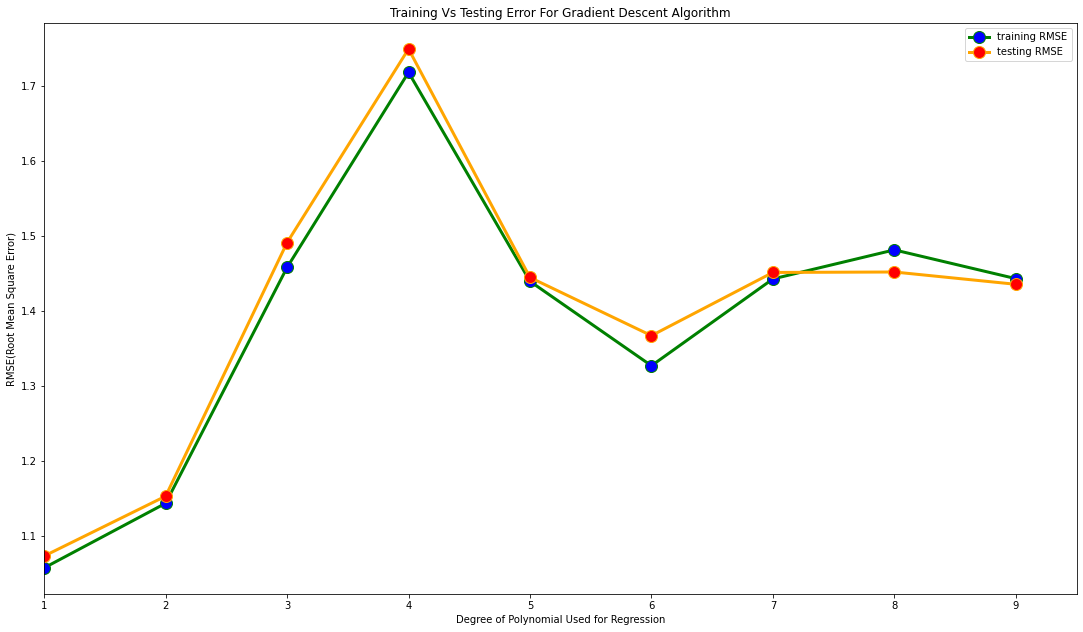

  Degrees    Training error    Testing error
---------  ----------------  ---------------
        1           1.0579           1.07371
        2           1.14404          1.15351
        3           1.45855          1.49167
        4           1.71864          1.74981
        5           1.43998          1.44509
        6           1.32744          1.36754
        7           1.44315          1.45182
        8           1.48191          1.45241
        9           1.44357          1.43602


In [ ]:
#traing vs testing error part

#for GDA

#for degree i coefficents are stored in omegas[i] and corresponding powers of x1 and x2 are stored in finlist[i]

# we would create a function of RMS of Error to compare the contrast between training and testing data

import math 

def MSE(y_real, y_pred):
    #print('here in function '+str(y_real.size))
    msee = np.sum((y_real-y_pred)**2) / len(y_real)
    return msee


y_training=np.ones([9,1])
y_testing=np.ones([9,1])

degrees_x_axis=np.ones([9,1])

for x in range(1,10):
    print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm training error (RMSE) is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
    
    degrees_x_axis[x-1]=x
    
    omega_arr=np.array(omegas[x-1]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
    temp_ones=np.ones([1,x1_s_tr.size])
    y_pred=np.zeros([1,x1_s_tr.size])
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([1,x1_s_tr.size])
        temp_x2=np.ones([1,x2_s_tr.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,x1_s_tr)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,x2_s_tr)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    msee=MSE(y_s_tr,y_pred)
    msee=math.sqrt(msee)
    print(msee)
    
    y_training[x-1]=msee
    
    print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm testing error (RMSE) is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
    
    omega_arr=np.array(omegas[x-1]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
    temp_ones=np.ones([1,x1_s_ts.size])
    y_pred=np.zeros([1,x1_s_ts.size])
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([1,x1_s_ts.size])
        temp_x2=np.ones([1,x2_s_ts.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,x1_s_ts)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,x2_s_ts)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    msee=MSE(y_s_ts,y_pred)
    msee=math.sqrt(msee)
    print(msee)
    
    y_testing[x-1]=msee
    
    print('\n')
    
# plotting the training data points
plt.plot(degrees_x_axis, y_training, label = "training RMSE",color='green', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)
# plotting the line 2 points
plt.plot(degrees_x_axis, y_testing, label = "testing RMSE",color='orange', linewidth = 3,marker='o', markerfacecolor='red', markersize=12)
plt.xlim(1,9.5) 
plt.xlabel('Degree of Polynomial Used for Regression')
plt.ylabel('RMSE(Root Mean Square Error)')

plt.title('Training Vs Testing Error For Gradient Descent Algorithm')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# function to show the plot
plt.show()
     
        
        
from tabulate import tabulate
data = [[1,y_training[0],y_testing[0]],[2,y_training[1],y_testing[1]],[3,y_training[2],y_testing[2]],[4,y_training[3],y_testing[3]],
        [5,y_training[4],y_testing[4]],[6,y_training[5],y_testing[5]],[7,y_training[6],y_testing[6]],[8,y_training[7],y_testing[7]],
        [9,y_training[8],y_testing[8]] ] 
print (tabulate(data, headers=["Degrees", "Training error", "Testing error"]))

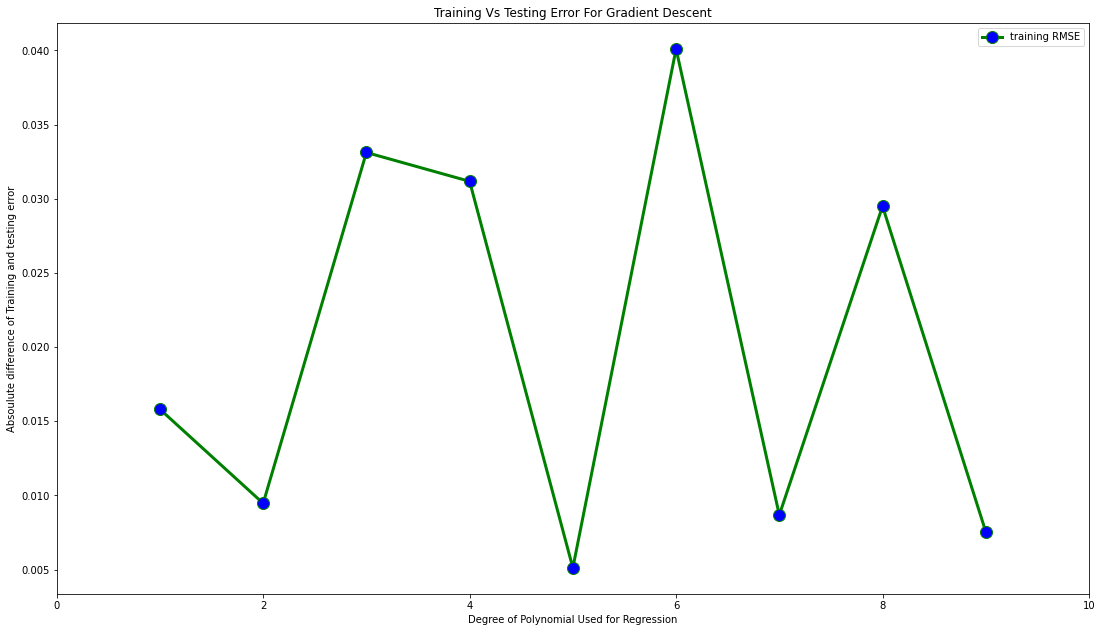

In [ ]:
# plotting the abs difference of testing and training data points
plt.plot(degrees_x_axis, abs(y_training-y_testing), label = "training RMSE",color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

plt.xlim(0,10) 
plt.xlabel('Degree of Polynomial Used for Regression')
plt.ylabel('Absoulute difference of Training and testing error')

plt.title('Training Vs Testing Error For Gradient Descent')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# function to show the plot
plt.show()

for polynomial of degree 1 in Stochastic Gradient Descent Algorithm training error (RMSE) is as follows
0.9926378450334982
for polynomial of degree 1 Stochastic Gradient Descent Algorithm testing error (RMSE) is as follows
1.03357763785668


for polynomial of degree 2 in Stochastic Gradient Descent Algorithm training error (RMSE) is as follows
0.9925886266843137
for polynomial of degree 2 Stochastic Gradient Descent Algorithm testing error (RMSE) is as follows
1.10091074641151


for polynomial of degree 3 in Stochastic Gradient Descent Algorithm training error (RMSE) is as follows
0.9130541318635443
for polynomial of degree 3 Stochastic Gradient Descent Algorithm testing error (RMSE) is as follows
1.3675747268138931


for polynomial of degree 4 in Stochastic Gradient Descent Algorithm training error (RMSE) is as follows
0.9128650257109919
for polynomial of degree 4 Stochastic Gradient Descent Algorithm testing error (RMSE) is as follows
1.577102003686468


for polynomial of degree 5 in

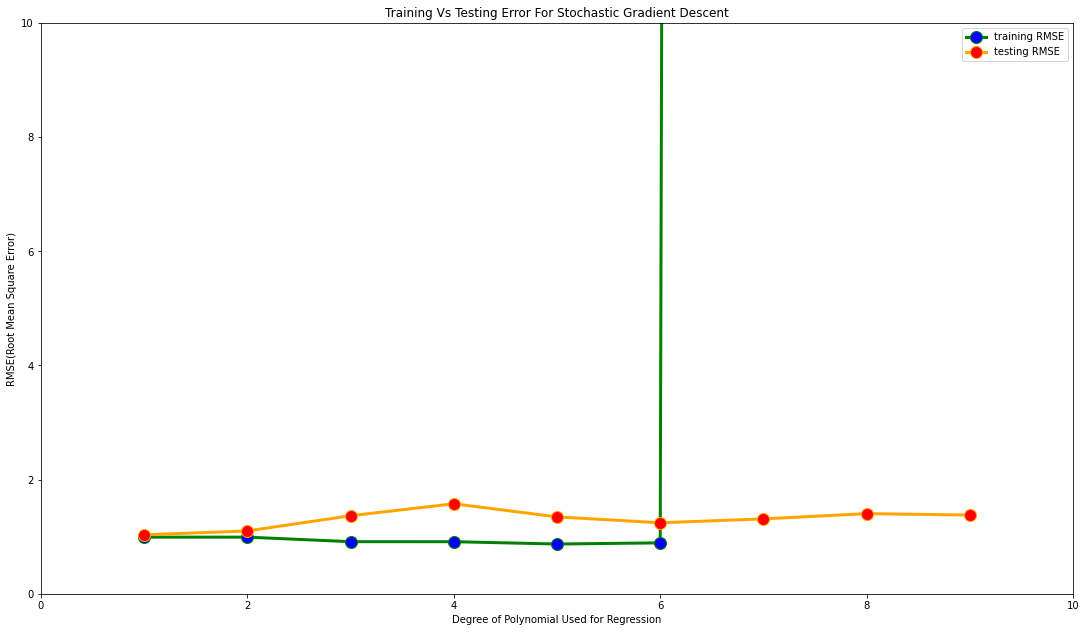

  Degrees    Training error    Testing error
---------  ----------------  ---------------
        1       0.992638             1.03358
        2       0.992589             1.10091
        3       0.913054             1.36757
        4       0.912865             1.5771
        5       0.872216             1.3476
        6       0.892389             1.24425
        7     645.838                1.31252
        8       9.17638e+37          1.40452
        9       1.02325e+96          1.37946


In [ ]:
#traing vs testing error part

#for SDA

#for degree i coefficents are stored in omegas_2[i] and corresponding powers of x1 and x2 are stored in finlist[i]

# we would create a function of RMS of Error to compare the contrast between training and testing data

y_training=np.ones([9,1]) #this vector contains pressure result of training data obtained from the regression model made for different degrees of polynomial from 1 to 9
y_testing=np.ones([9,1])  #this vector contains pressure result of testing data obtained from the regression model made for different degrees of polynomial from 1 to 9

degrees_x_axis=np.ones([9,1]) #storing the degrees of polynomial


for x in range(1,10):
    print('for polynomial of degree '+str(x)+' in Stochastic Gradient Descent Algorithm training error (RMSE) is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array

    omega_arr=np.array(omegas_2[x-1]).reshape(u,1)
    
    degrees_x_axis[x-1]=x
    
    #now calculating y from predicted values of omeagas of SDA
    temp_ones=np.ones([1,x1_s_trrr.size])
    y_pred=np.zeros([1,x1_s_trrr.size])
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([1,x1_s_trrr.size])
        temp_x2=np.ones([1,x2_s_trrr.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,x1_s_trrr)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,x2_s_trrr)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    msee=MSE(y_s_trrr,y_pred)
    msee=math.sqrt(msee)
    print(msee)
    
    y_training[x-1]=msee
    
    print('for polynomial of degree '+str(x)+' Stochastic Gradient Descent Algorithm testing error (RMSE) is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
    
    omega_arr=np.array(omegas[x-1]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
    temp_ones=np.ones([1,x1_s_tsss.size])
    y_pred=np.zeros([1,x1_s_tsss.size])
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([1,x1_s_tsss.size])
        temp_x2=np.ones([1,x2_s_tsss.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,x1_s_tsss)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,x2_s_tsss)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    msee=MSE(y_s_tsss,y_pred)
    msee=math.sqrt(msee)
    print(msee)
    y_testing[x-1]=msee
    print('\n')
    

# plotting the training data points
plt.plot(degrees_x_axis, y_training, label = "training RMSE",color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
# plotting the line 2 points
plt.plot(degrees_x_axis, y_testing, label = "testing RMSE",color='orange', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12)
plt.xlim(1,9.5) 
plt.xlabel('Degree of Polynomial Used for Regression')
plt.ylabel('RMSE(Root Mean Square Error)')

plt.title('Training Vs Testing Error For Stochastic Gradient Descent')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,10)
plt.xlim(0,10)
# function to show the plot
plt.show()

from tabulate import tabulate
data = [[1,y_training[0],y_testing[0]],[2,y_training[1],y_testing[1]],[3,y_training[2],y_testing[2]],[4,y_training[3],y_testing[3]],
        [5,y_training[4],y_testing[4]],[6,y_training[5],y_testing[5]],[7,y_training[6],y_testing[6]],[8,y_training[7],y_testing[7]],
        [9,y_training[8],y_testing[8]] ] 
print (tabulate(data, headers=["Degrees", "Training error", "Testing error"]))

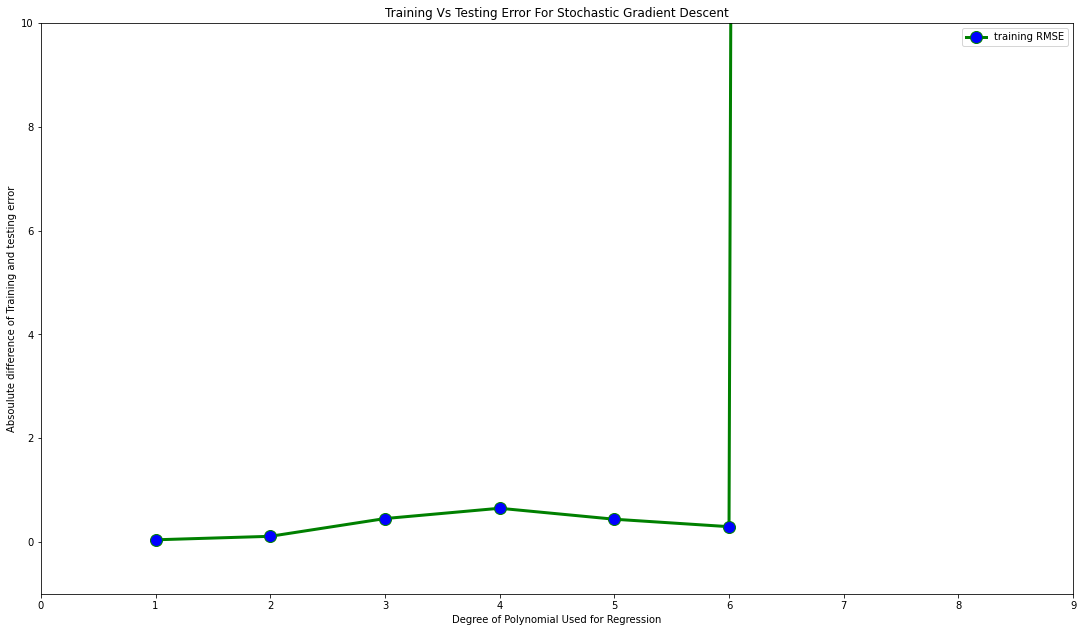

In [ ]:
# plotting the training data points
plt.plot(degrees_x_axis, abs(y_training-y_testing), label = "training RMSE",color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

plt.xlim(0,9) 
plt.xlabel('Degree of Polynomial Used for Regression')
plt.ylabel('Absoulute difference of Training and testing error')
plt.ylim(-1,10)

plt.title('Training Vs Testing Error For Stochastic Gradient Descent')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# function to show the plot
plt.show()


for polynomial of degree 1 in Stochastic Gradient Descent Algorithm surface plot is as follows


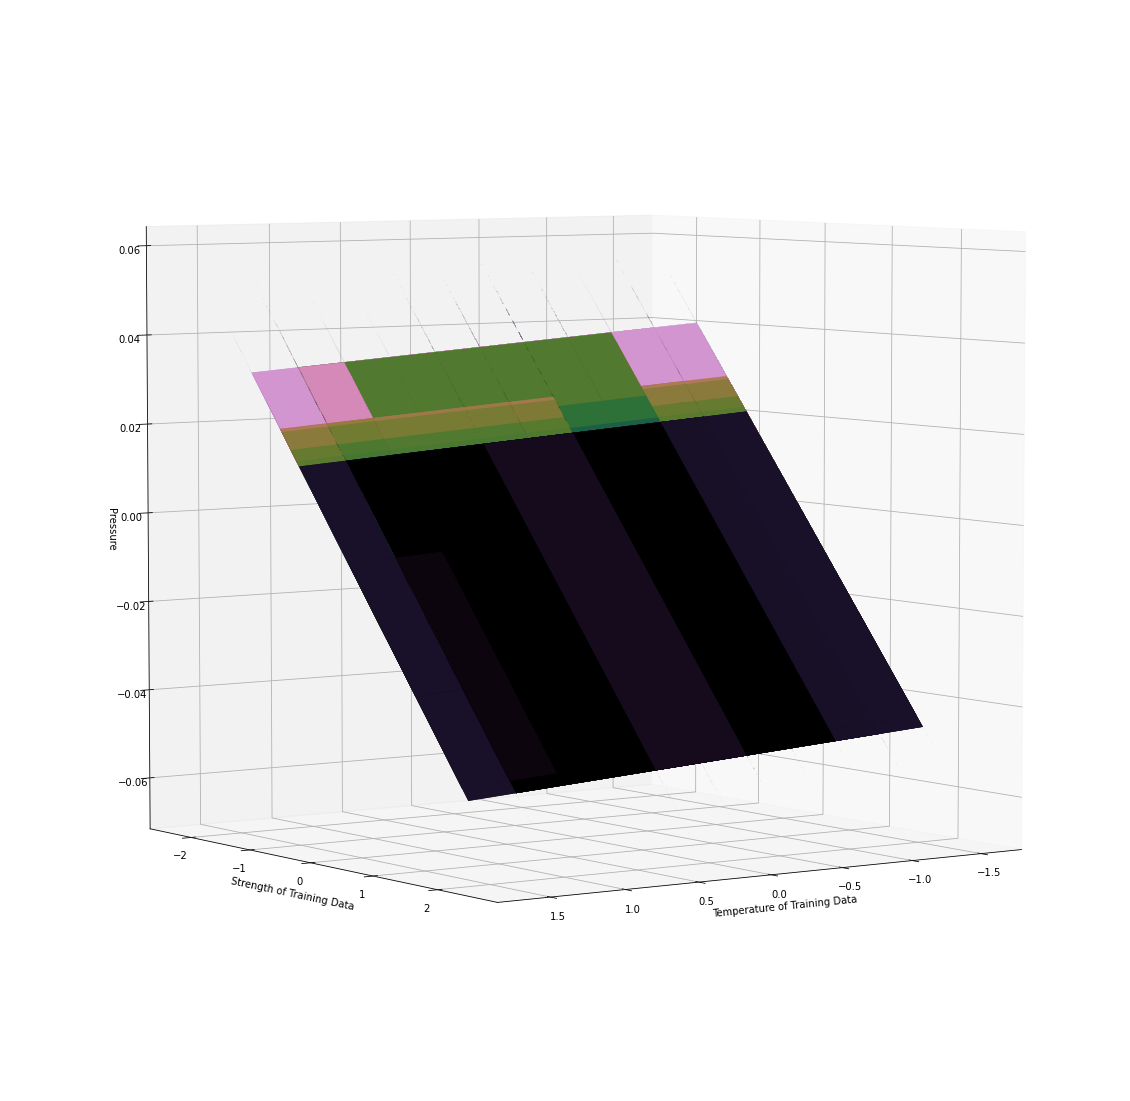

for polynomial of degree 2 in Stochastic Gradient Descent Algorithm surface plot is as follows


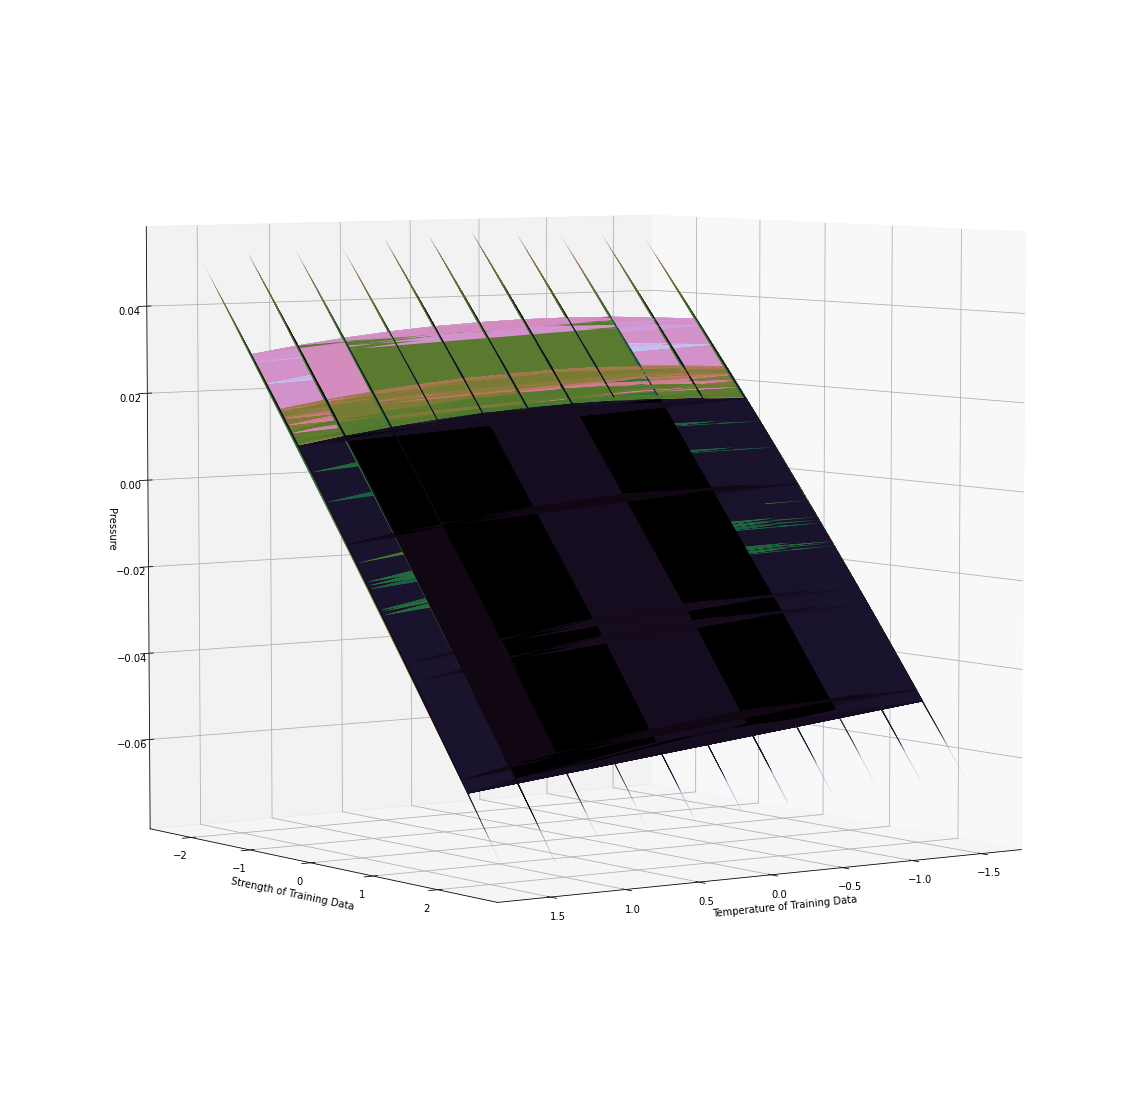

for polynomial of degree 3 in Stochastic Gradient Descent Algorithm surface plot is as follows


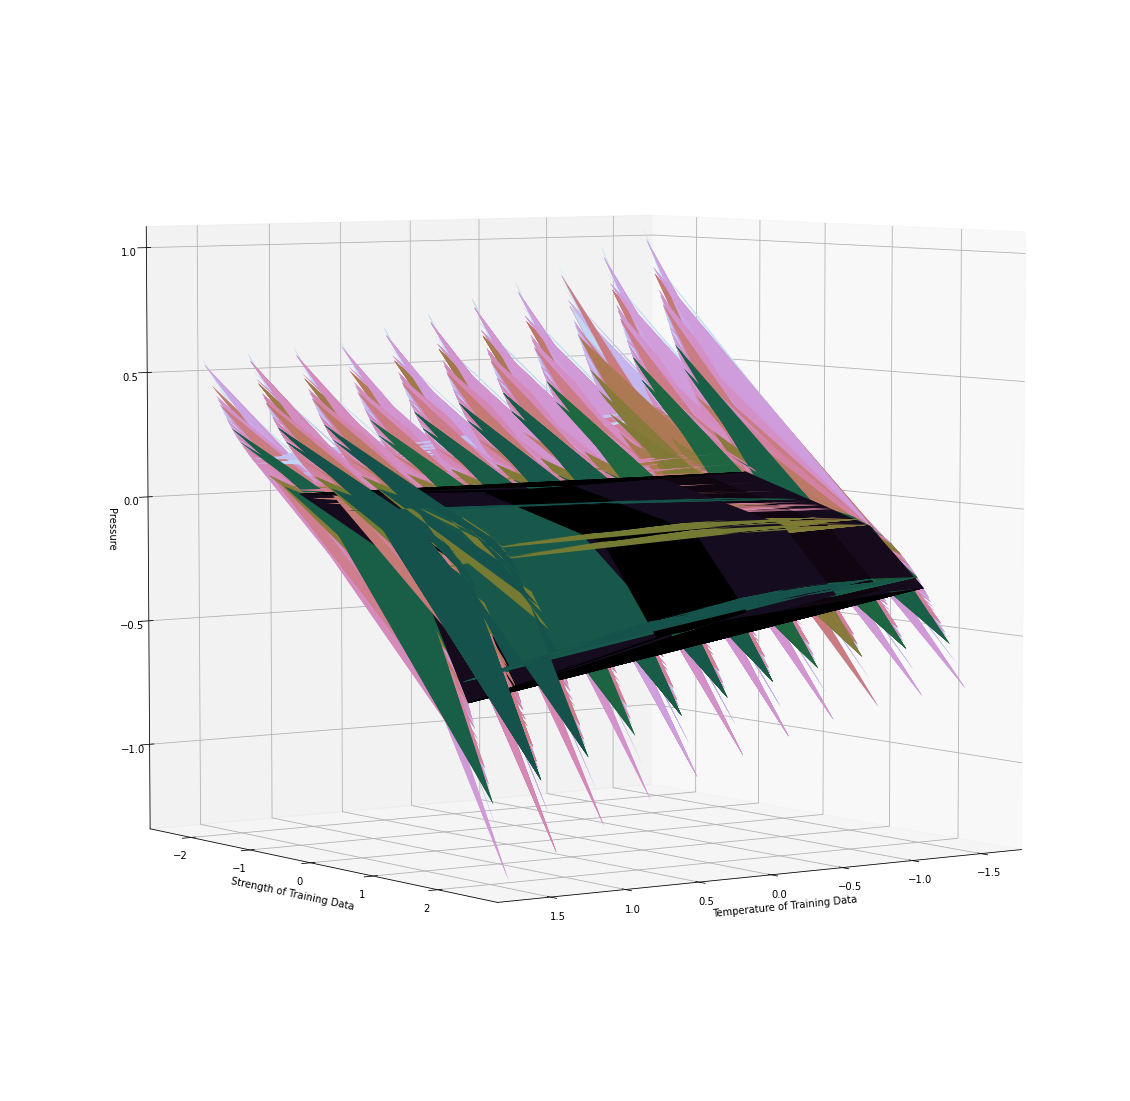

for polynomial of degree 4 in Stochastic Gradient Descent Algorithm surface plot is as follows


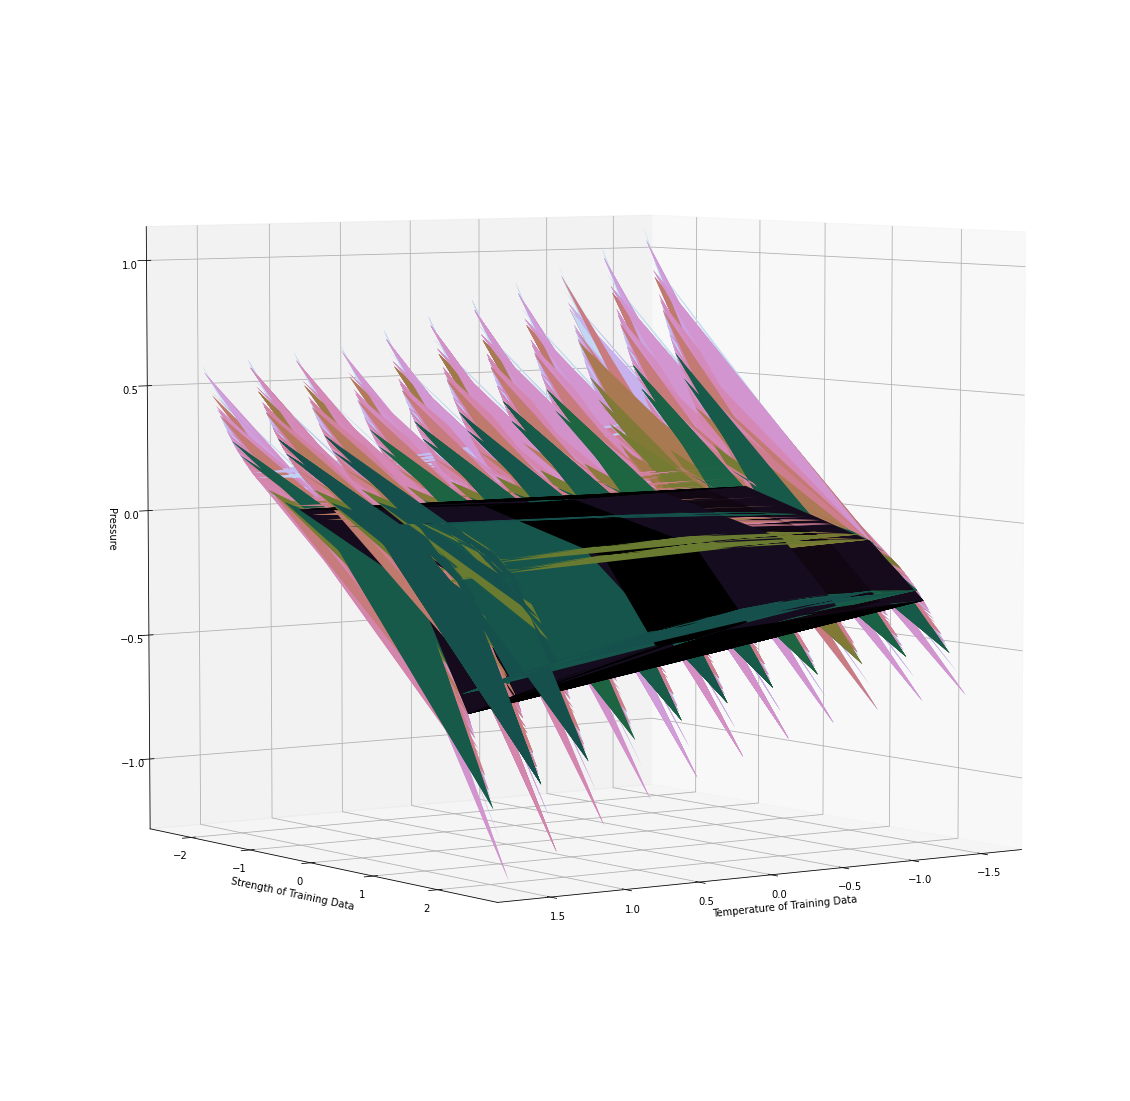

for polynomial of degree 5 in Stochastic Gradient Descent Algorithm surface plot is as follows


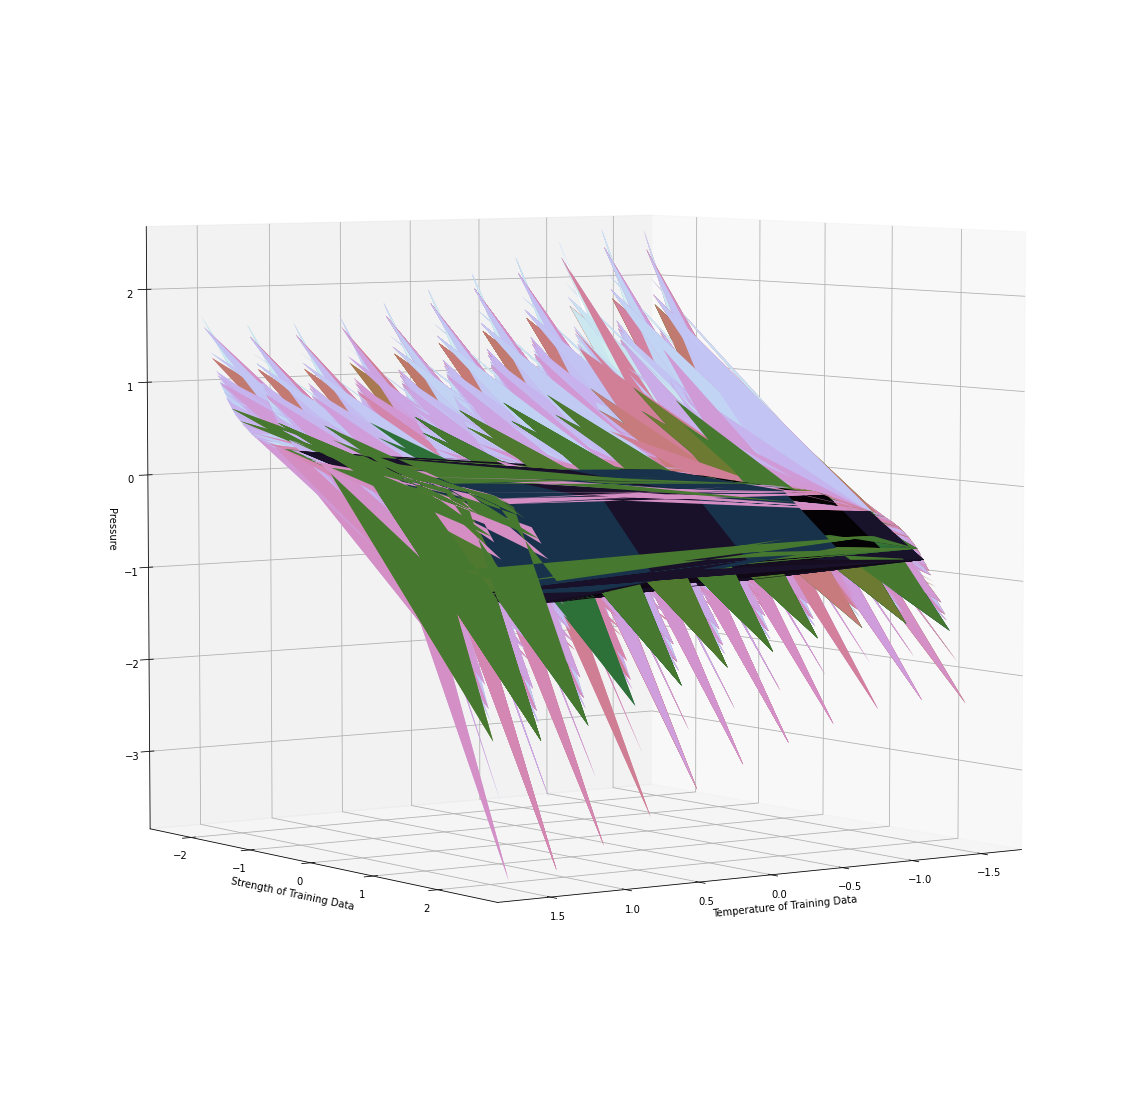

for polynomial of degree 6 in Stochastic Gradient Descent Algorithm surface plot is as follows


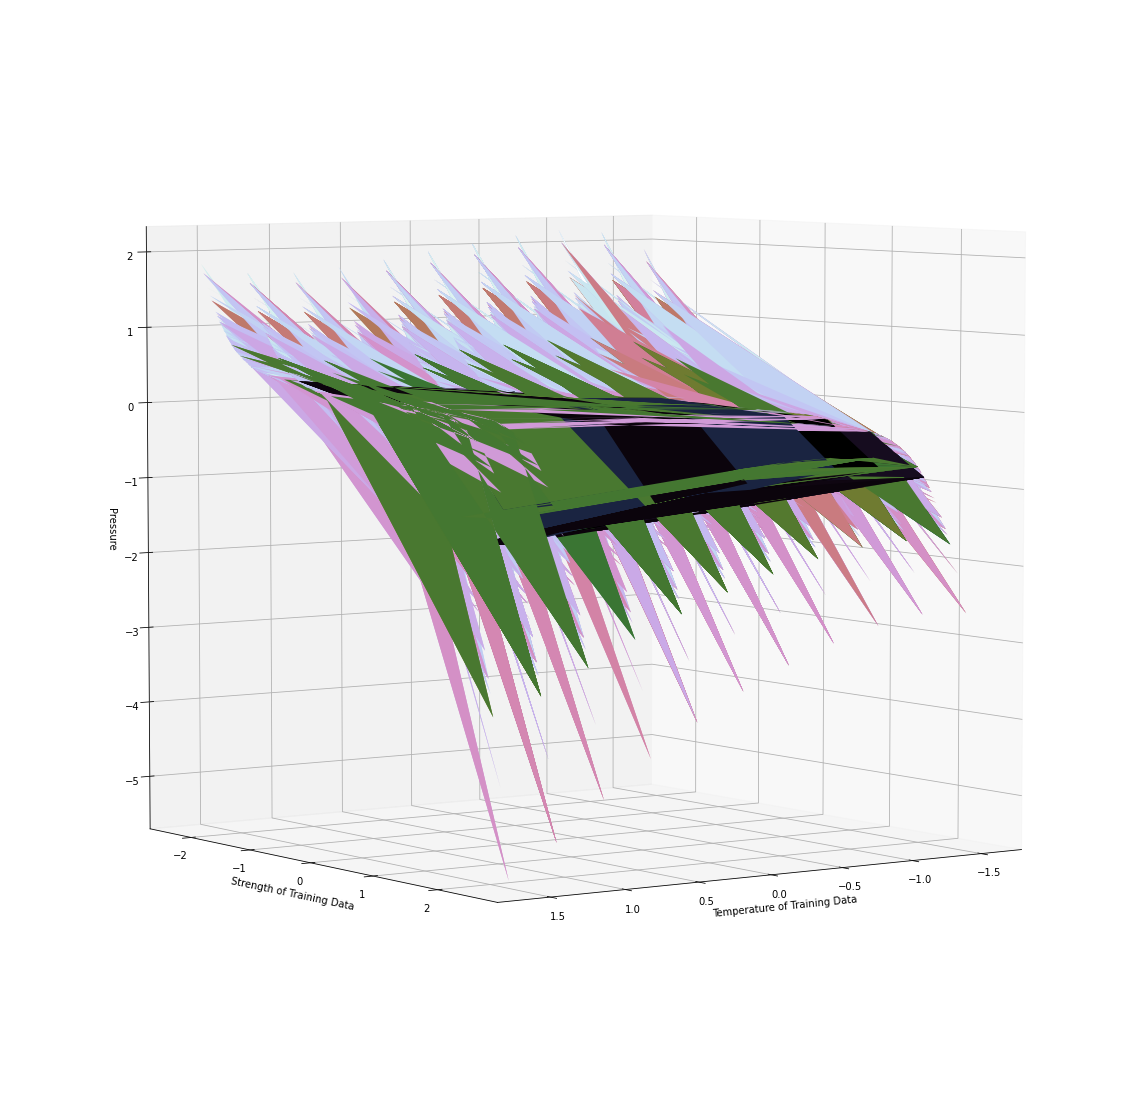

for polynomial of degree 7 in Stochastic Gradient Descent Algorithm surface plot is as follows


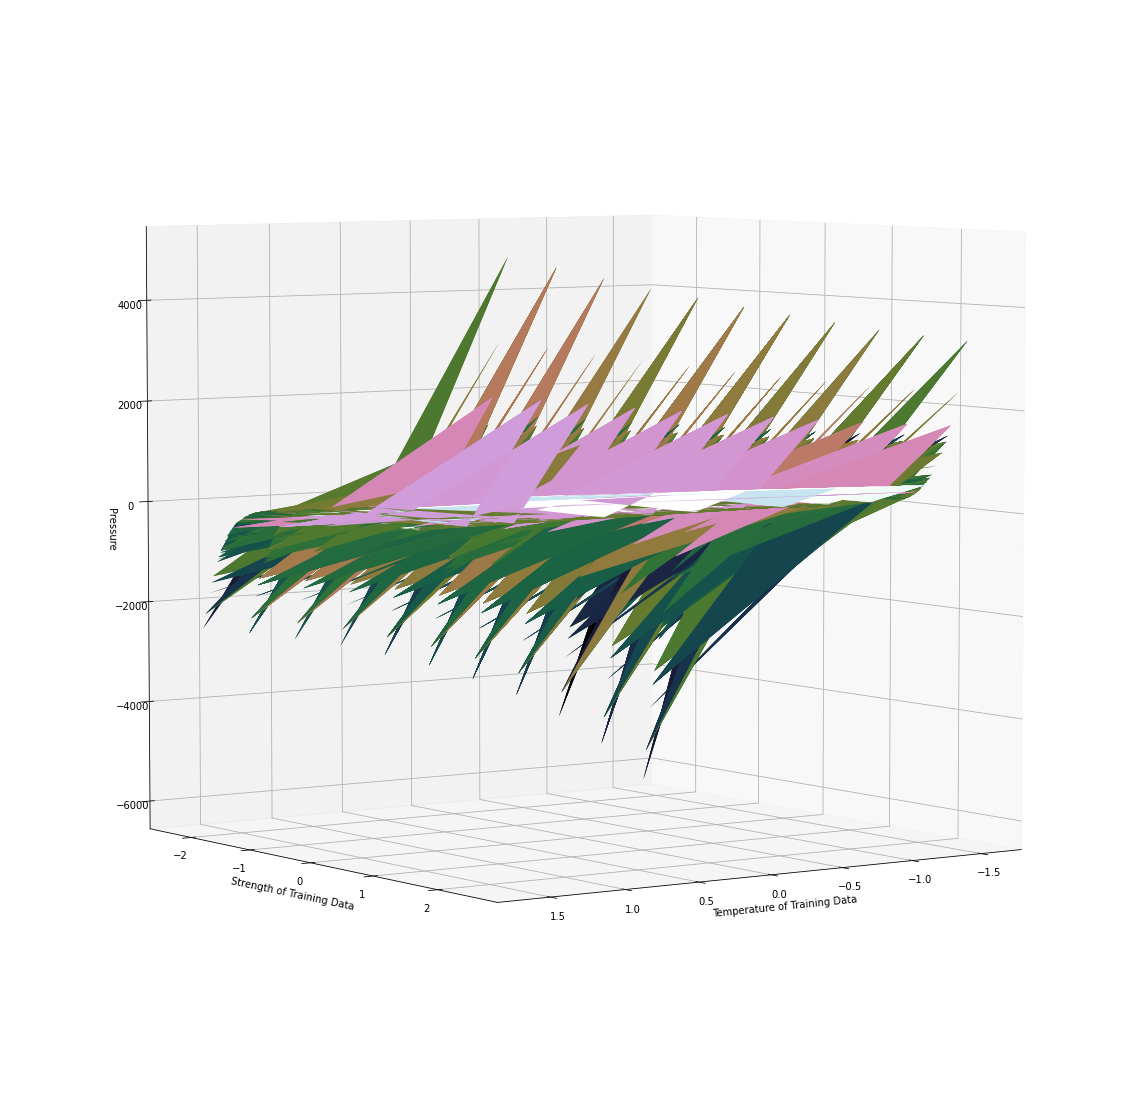

for polynomial of degree 8 in Stochastic Gradient Descent Algorithm surface plot is as follows


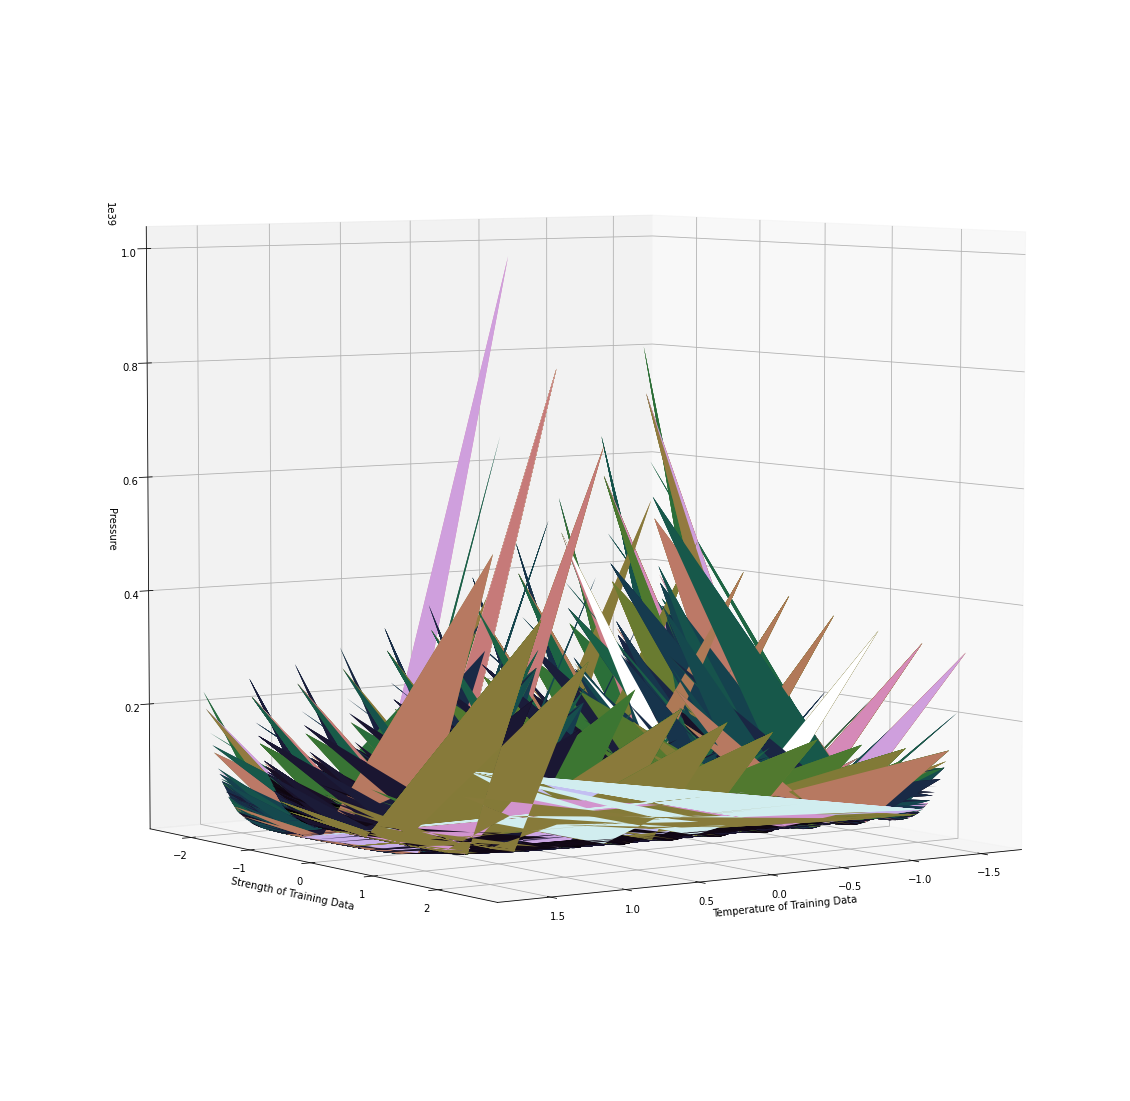

for polynomial of degree 9 in Stochastic Gradient Descent Algorithm surface plot is as follows


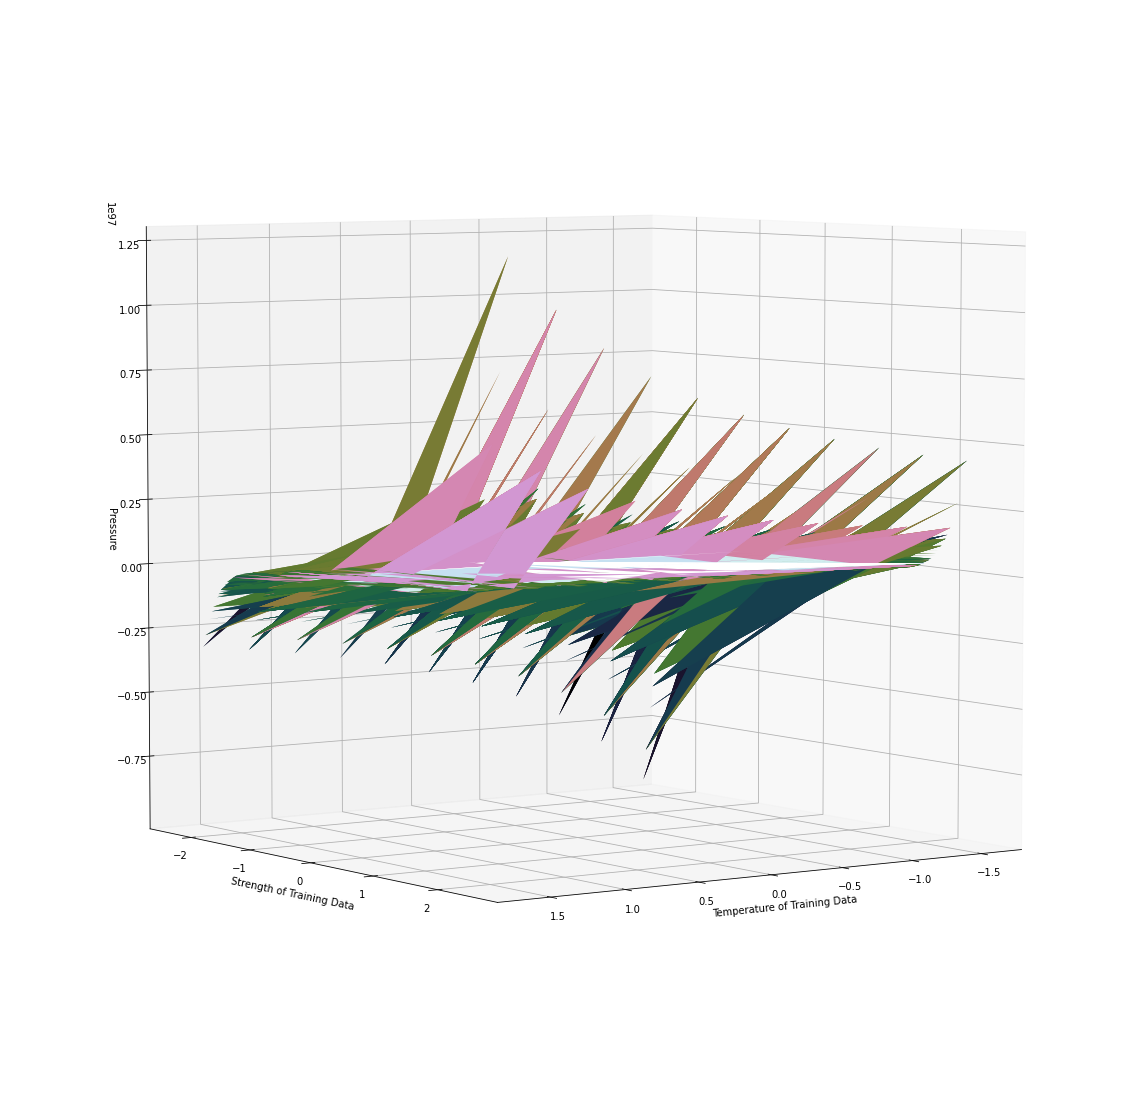

In [ ]:
#this one is for SGDA

X, Y = np.meshgrid(x1_s_tr, x2_s_tr)
y_pred=np.ones([x1_s_tr.size,x1_s_tr.size])
y_pred*=w0_SDA

def plotter(E,A):
      fig=plt.figure(figsize=[15,15])
      ax = plt.axes(projection='3d')
      ax.plot_surface(X, Y, y_pred,cmap="ocean");
      ax.view_init(elev=E,azim=A)
      ax.set_xlabel('Temperature of Training Data')
      ax.set_ylabel('Strength of Training Data')
      ax.set_zlabel('Pressure')
      plt.show()
      
    #from ipywidgets import interactive
    #iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
    #iplot
plotter(5,55)

for x in range(1,10):
    print('for polynomial of degree '+str(x)+' in Stochastic Gradient Descent Algorithm surface plot is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array

    omega_arr=np.array(omegas_2[x-1]).reshape(u,1)
    
    degrees_x_axis[x-1]=x
    
    #now calculating y from predicted values of omeagas of SDA
    temp_ones=np.ones([1,x1_s_tr.size])
    

    
    
    X, Y = np.meshgrid(x1_s_tr, x2_s_tr)
    
    y_pred=np.zeros([x1_s_tr.size,x1_s_tr.size])
    
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([x1_s_tr.size,x1_s_tr.size])
        temp_x2=np.ones([x1_s_tr.size,x1_s_tr.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,X)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,Y)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    
    def plotter(E,A):
      fig=plt.figure(figsize=[10,10])
      ax = plt.axes(projection='3d')
      ax.plot_surface(X, Y, y_pred,cmap="cubehelix");
      ax.view_init(elev=E,azim=A)
      ax.set_xlabel('Temperature of Training Data')
      ax.set_ylabel('Strength of Training Data')
      ax.set_zlabel('Pressure')
      plt.show()
      
    #from ipywidgets import interactive
    #iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
    #iplot
    plotter(5,55)#put diffenrent values for elevation and azimuthal for plotting


for polynomial of degree 1 in Gradient Descent Algorithm surface plot is as follows


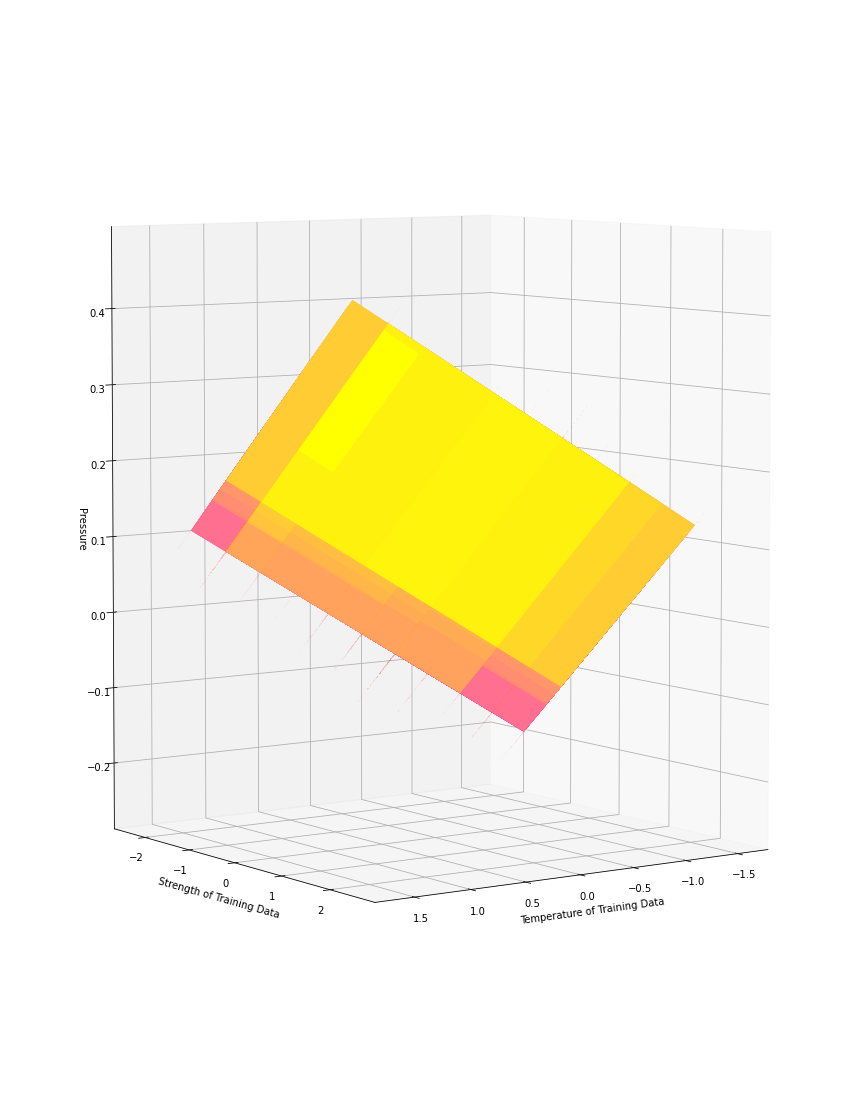

for polynomial of degree 2 in Gradient Descent Algorithm surface plot is as follows


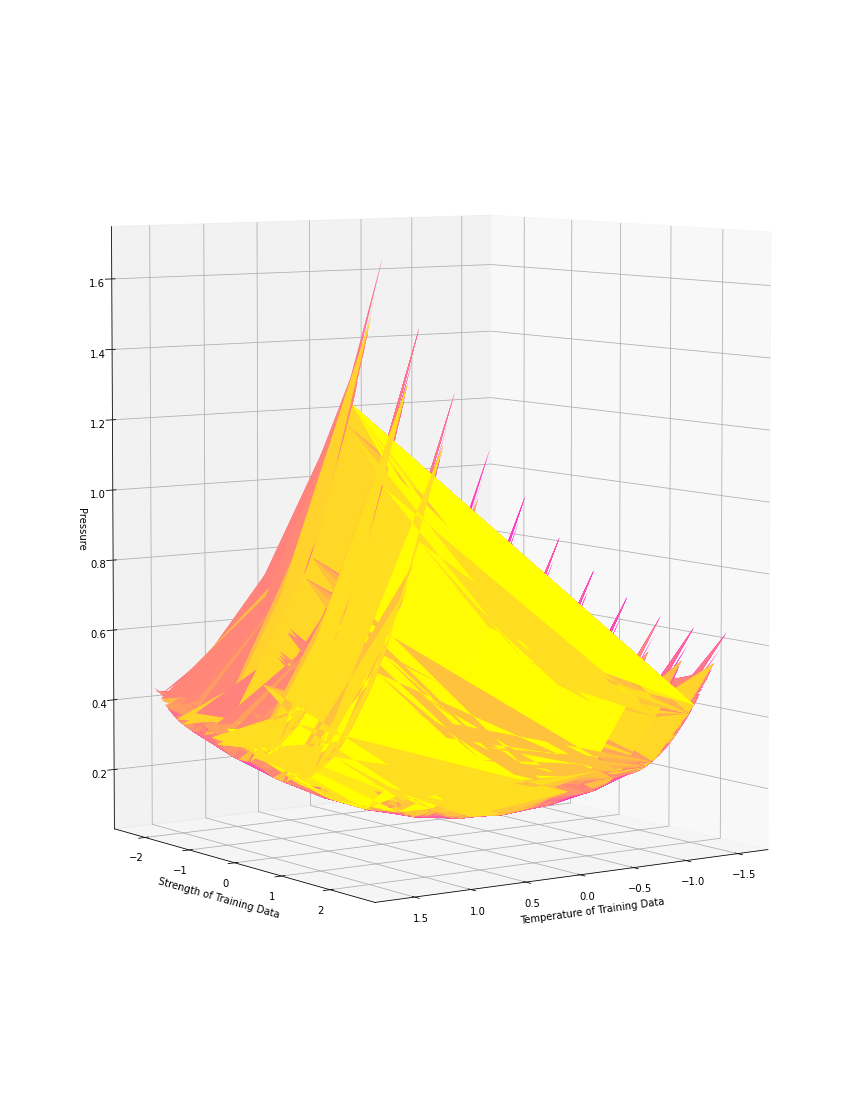

for polynomial of degree 3 in Gradient Descent Algorithm surface plot is as follows


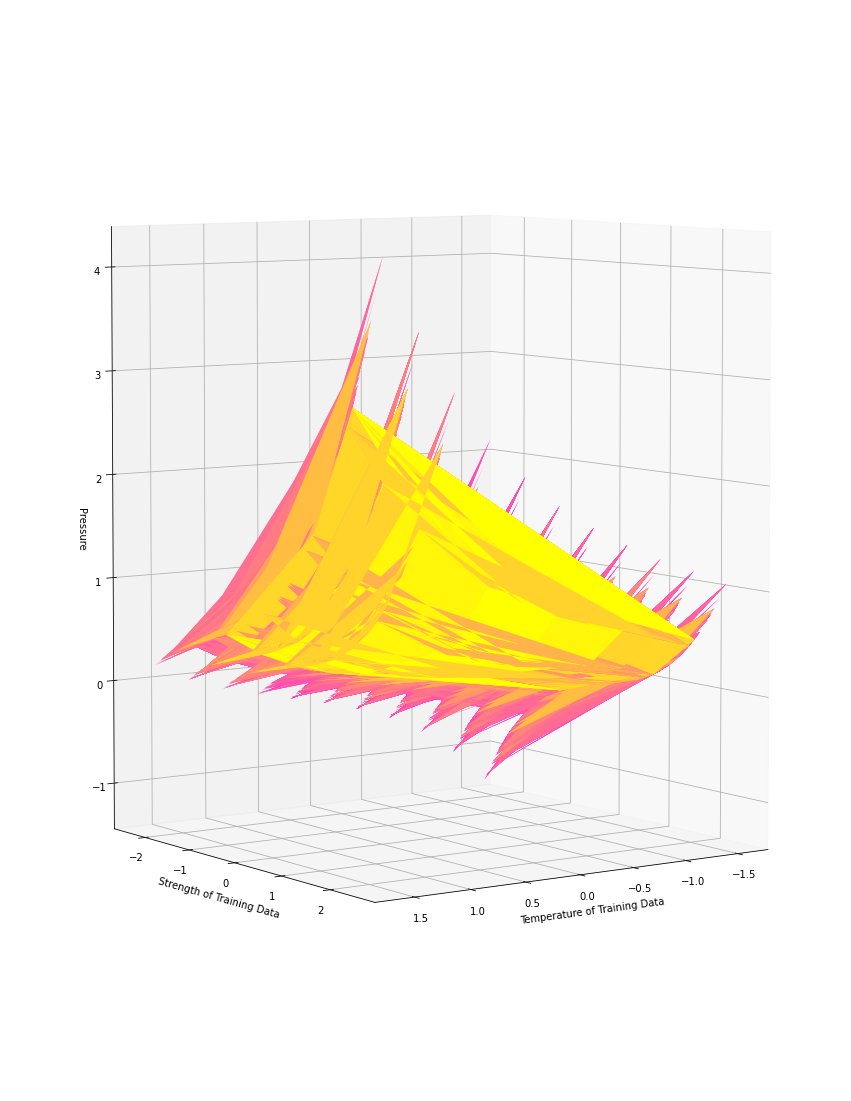

for polynomial of degree 4 in Gradient Descent Algorithm surface plot is as follows


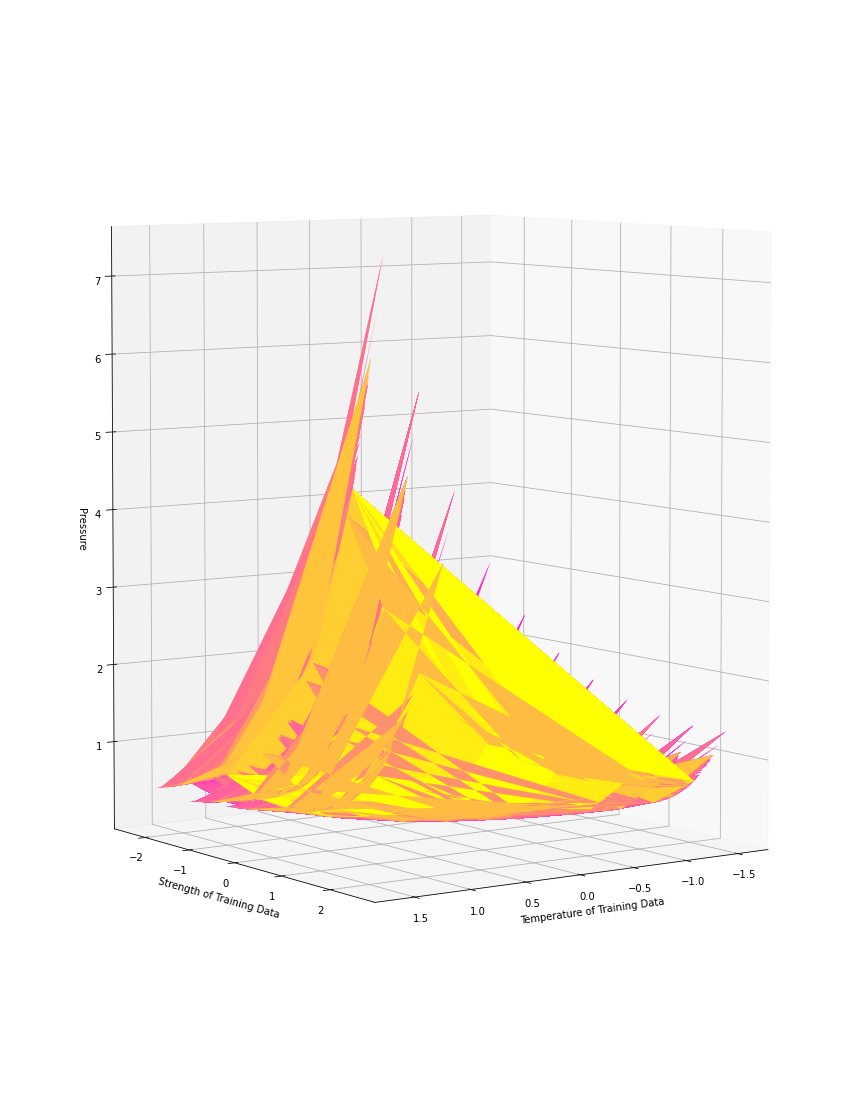

for polynomial of degree 5 in Gradient Descent Algorithm surface plot is as follows


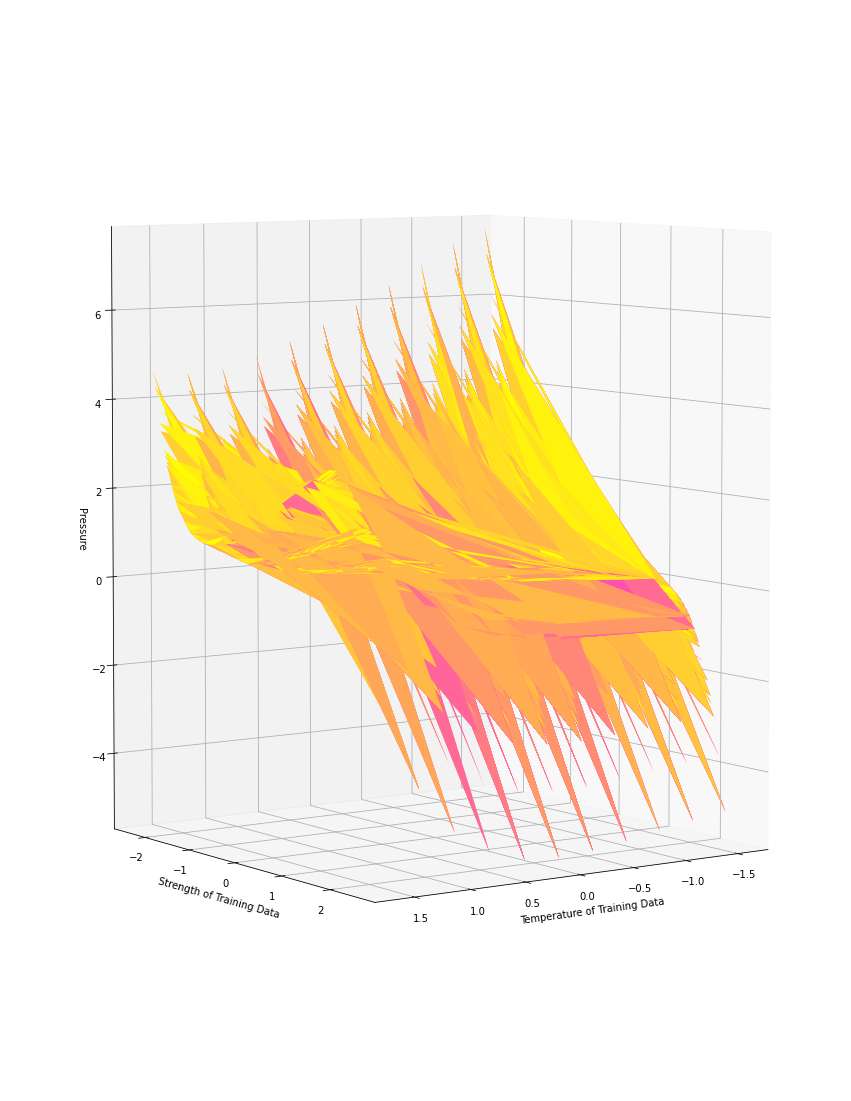

for polynomial of degree 6 in Gradient Descent Algorithm surface plot is as follows


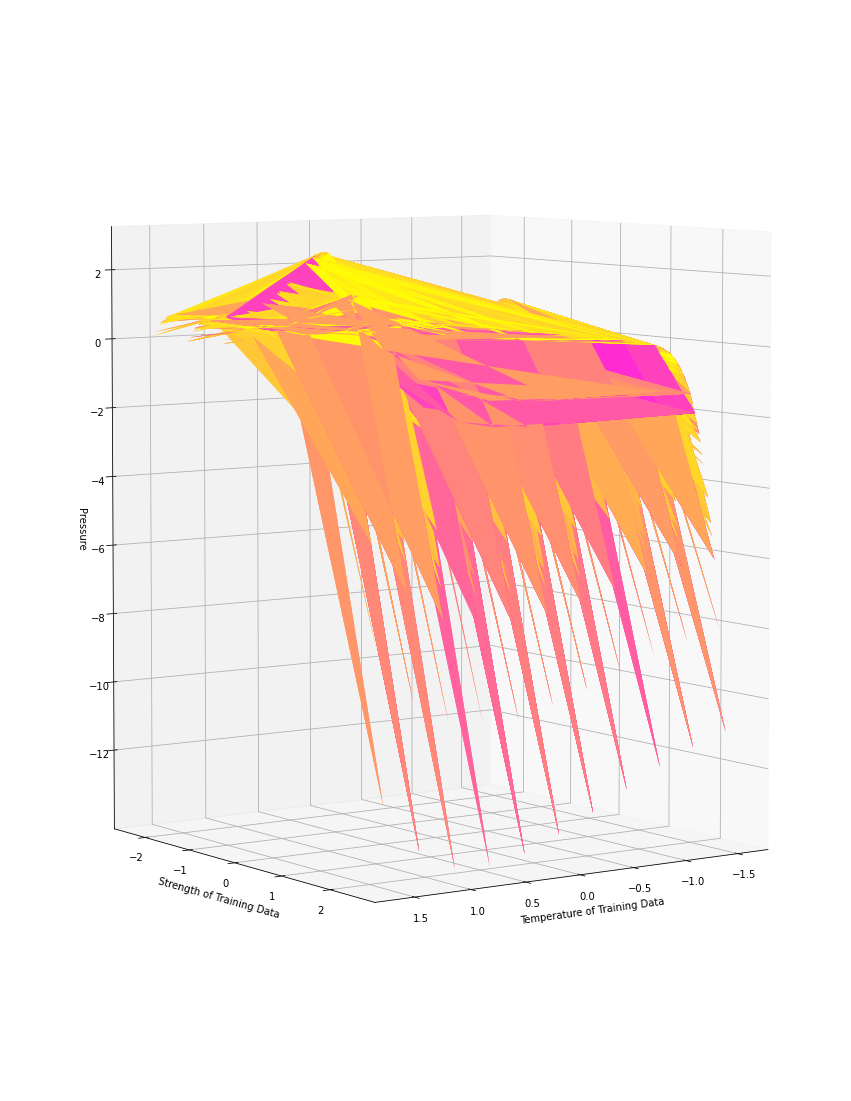

for polynomial of degree 7 in Gradient Descent Algorithm surface plot is as follows


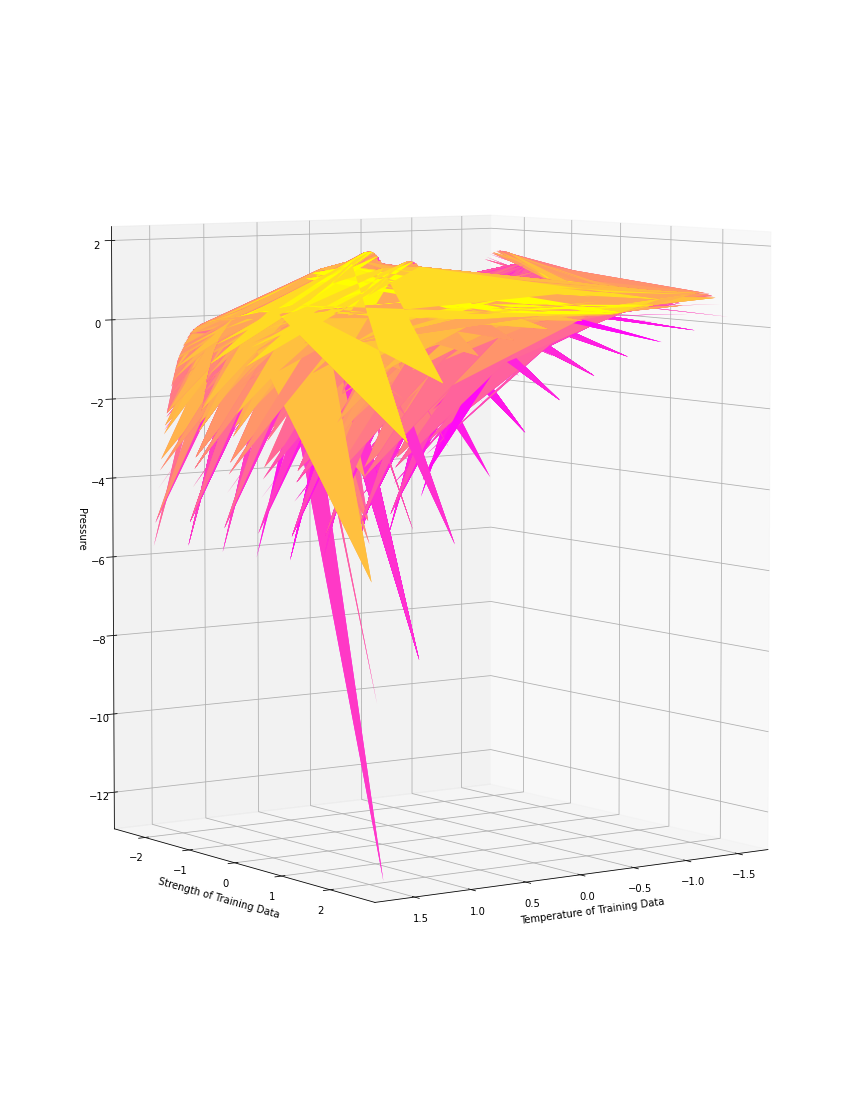

for polynomial of degree 8 in Gradient Descent Algorithm surface plot is as follows


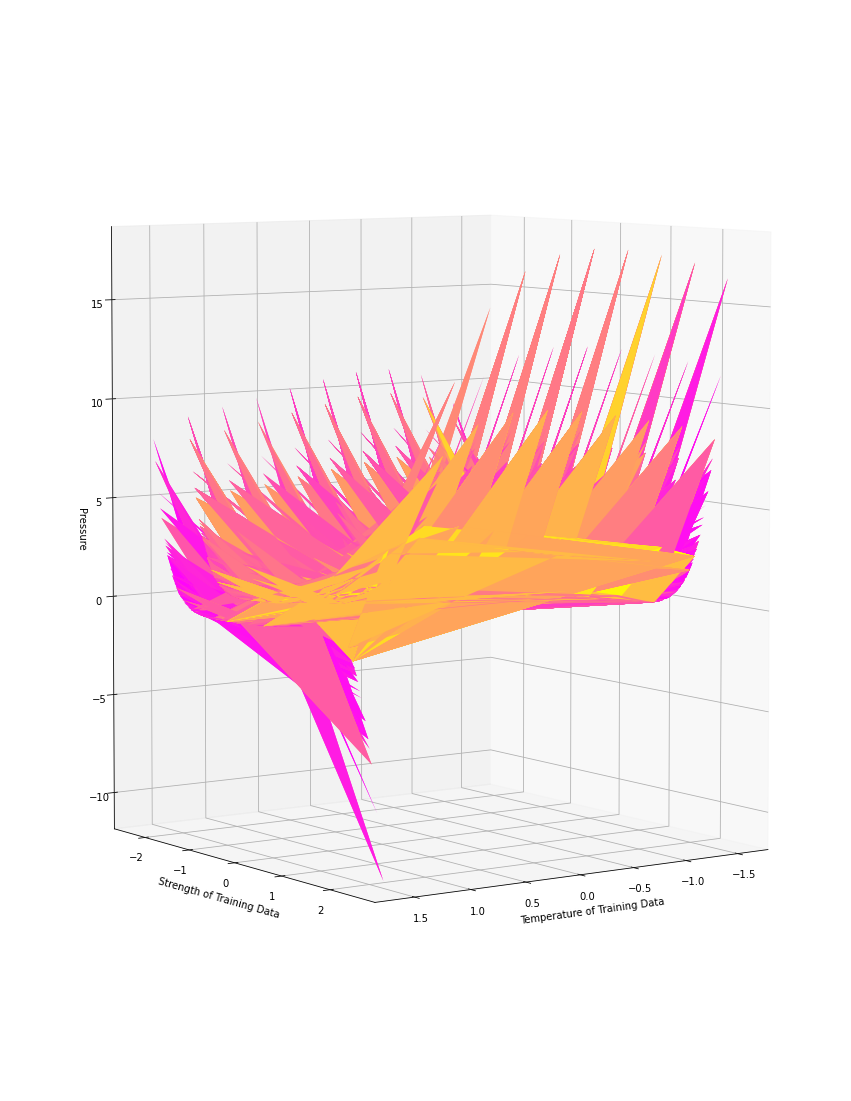

for polynomial of degree 9 in Gradient Descent Algorithm surface plot is as follows


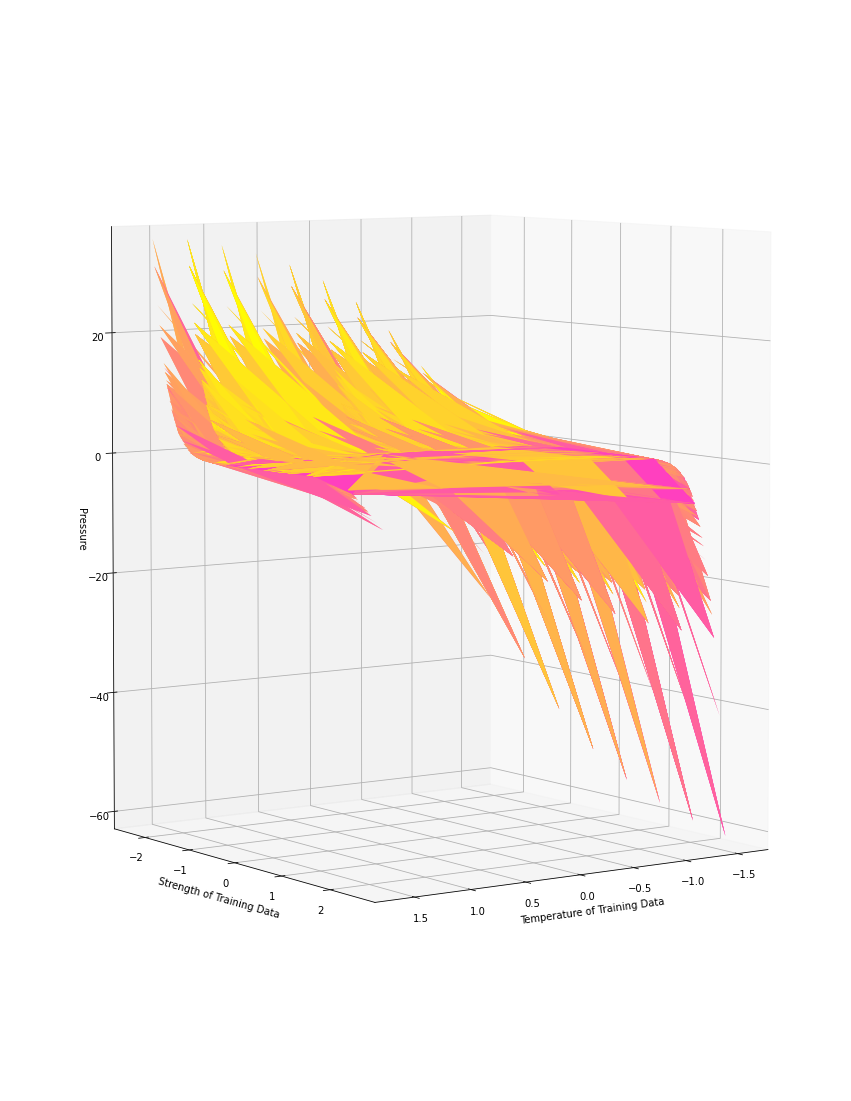

In [ ]:
# now plotting surface plots for GDA regression models
#this one is for GDA

# now plotting surface plots for GDA regression models
#this one is for GDA
print('for polynomial of degree 0 in Gradient Descent Algorithm surface plot is as follows')
X, Y = np.meshgrid(x1_s_tr, x2_s_tr)
y_pred=np.ones([x1_s_tr.size,x1_s_tr.size])
y_pred*=w0_SDA

def plotter(E,A):
      fig=plt.figure(figsize=[10,10])
      ax = plt.axes(projection='3d')
      ax.plot_surface(X, Y, y_pred,cmap="ocean");
      ax.view_init(elev=E,azim=A)
      ax.set_xlabel('Temperature of Training Data')
      ax.set_ylabel('Strength of Training Data')
      ax.set_zlabel('Pressure')
      plt.show()
      
    #from ipywidgets import interactive
    #iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
    #iplot
plotter(5,55)

for x in range(1,10):
    print('for polynomial of degree '+str(x)+' in Gradient Descent Algorithm surface plot is as follows')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array

    omega_arr=np.array(omegas[x-1]).reshape(u,1)
    
    degrees_x_axis[x-1]=x
    
    #now calculating y from predicted values of omeagas of SDA
    temp_ones=np.ones([1,x1_s_tr.size])
    

    
    
    X, Y = np.meshgrid(x1_s_tr, x2_s_tr)
    
    y_pred=np.zeros([x1_s_tr.size,x1_s_tr.size])
    
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([x1_s_tr.size,x1_s_tr.size])
        temp_x2=np.ones([x1_s_tr.size,x1_s_tr.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,X)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,Y)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    
    def plotter(E,A):
      fig=plt.figure(figsize=[10,10])
      ax = plt.axes(projection='3d')
      ax.plot_surface(X, Y, y_pred,cmap="spring");
      ax.view_init(elev=E,azim=A)
      ax.set_xlabel('Temperature of Training Data')
      ax.set_ylabel('Strength of Training Data')
      ax.set_zlabel('Pressure')
      plt.show()

    plotter(5,55)#put diffenrent values for elevation and azimuthal for plotting

for polynomial of degree 1 in scatter plots for all points


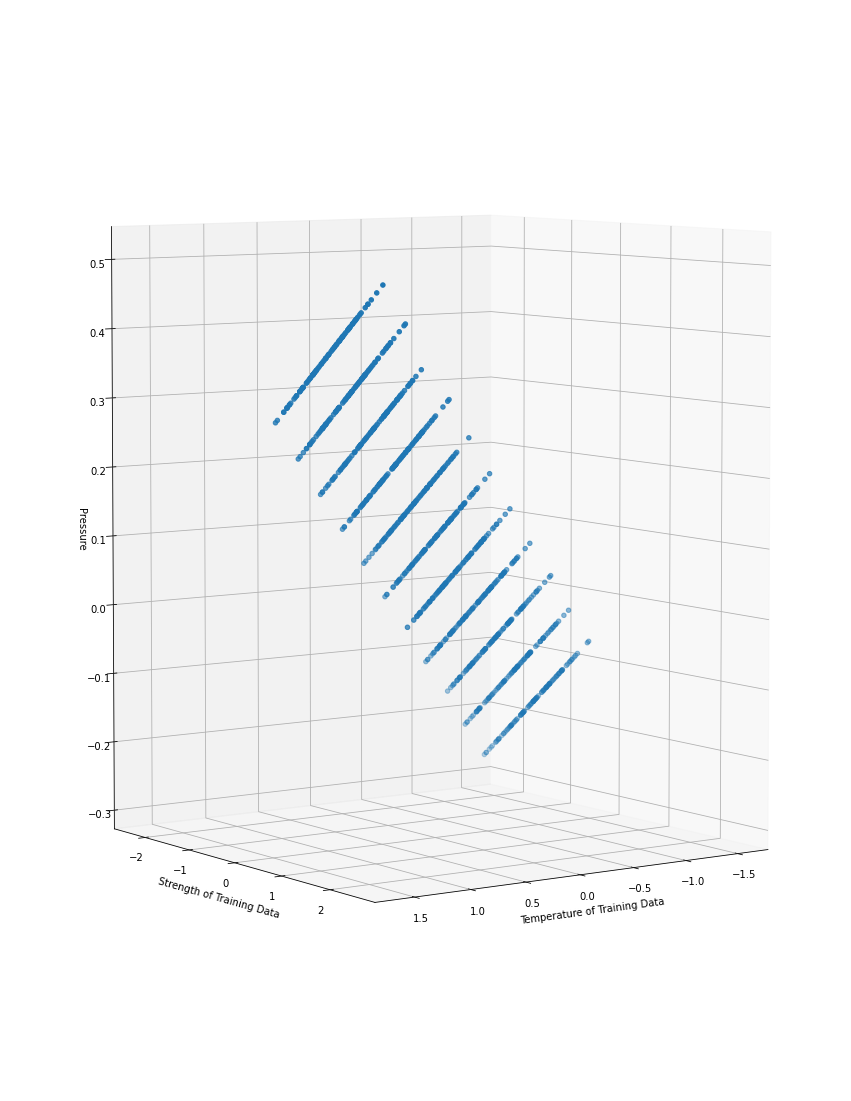

for polynomial of degree 2 in scatter plots for all points


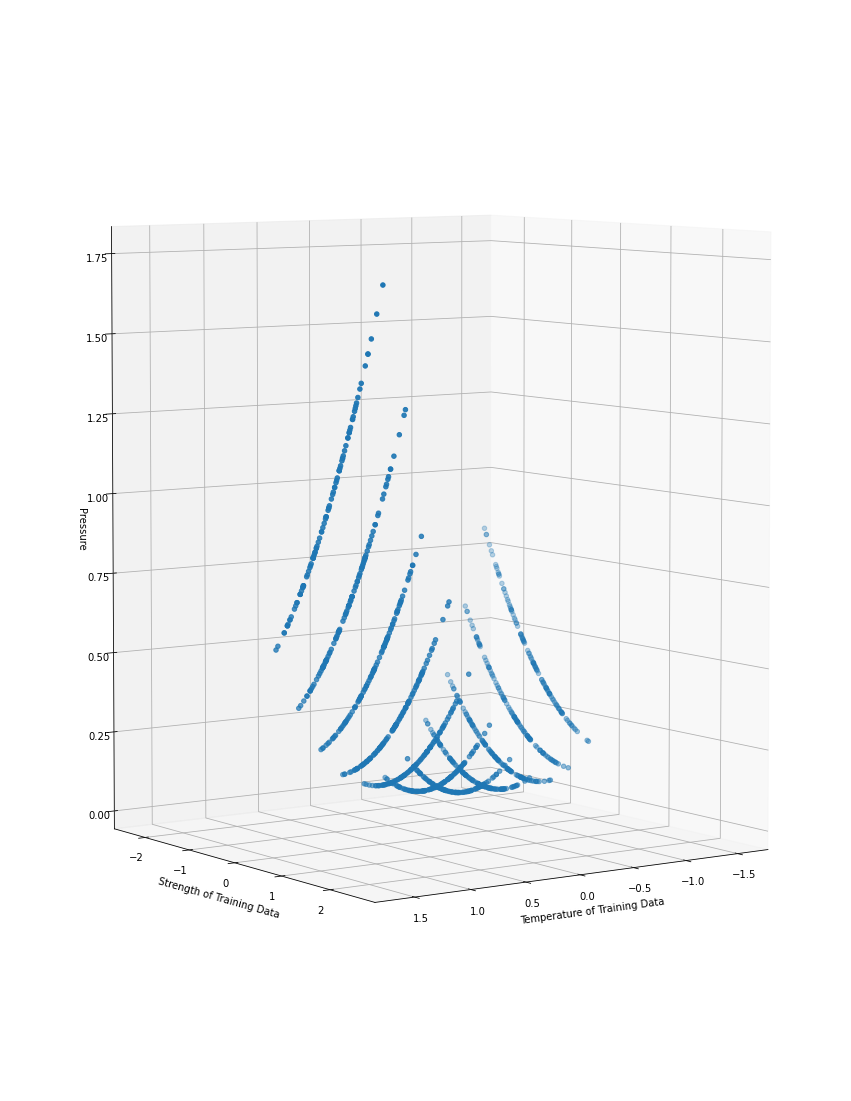

for polynomial of degree 3 in scatter plots for all points


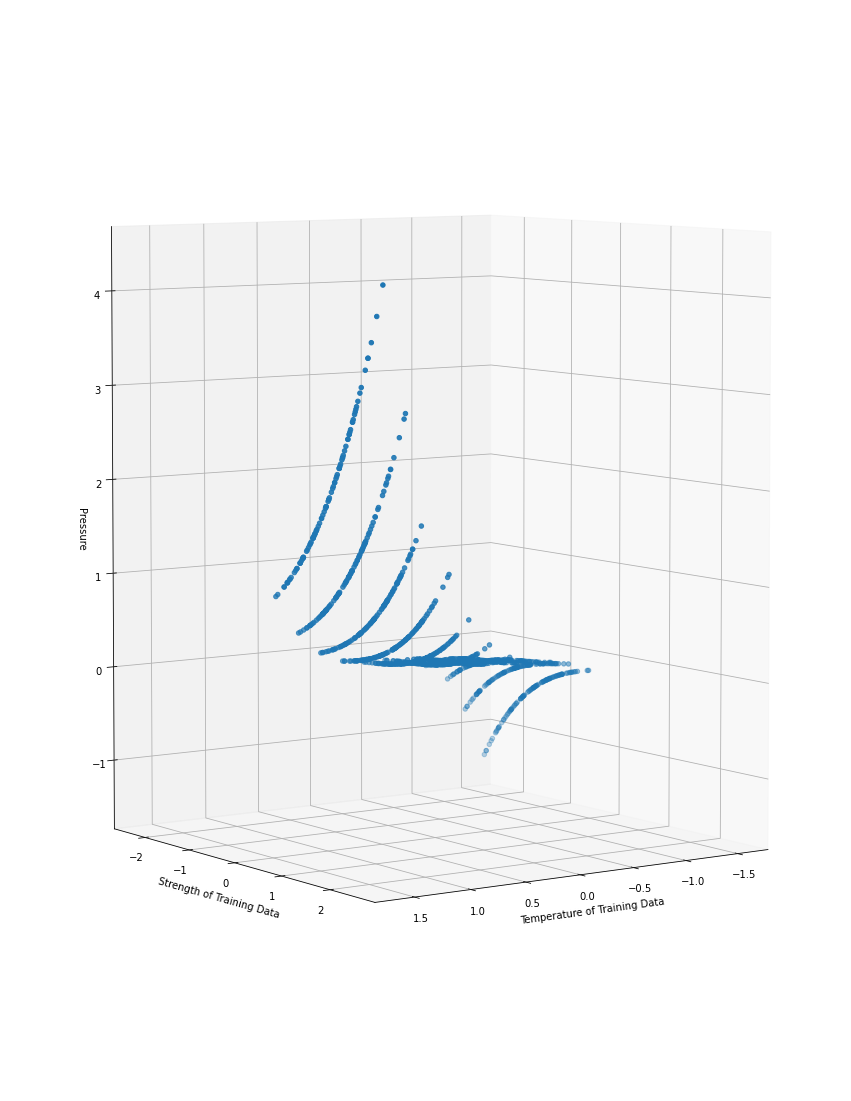

for polynomial of degree 4 in scatter plots for all points


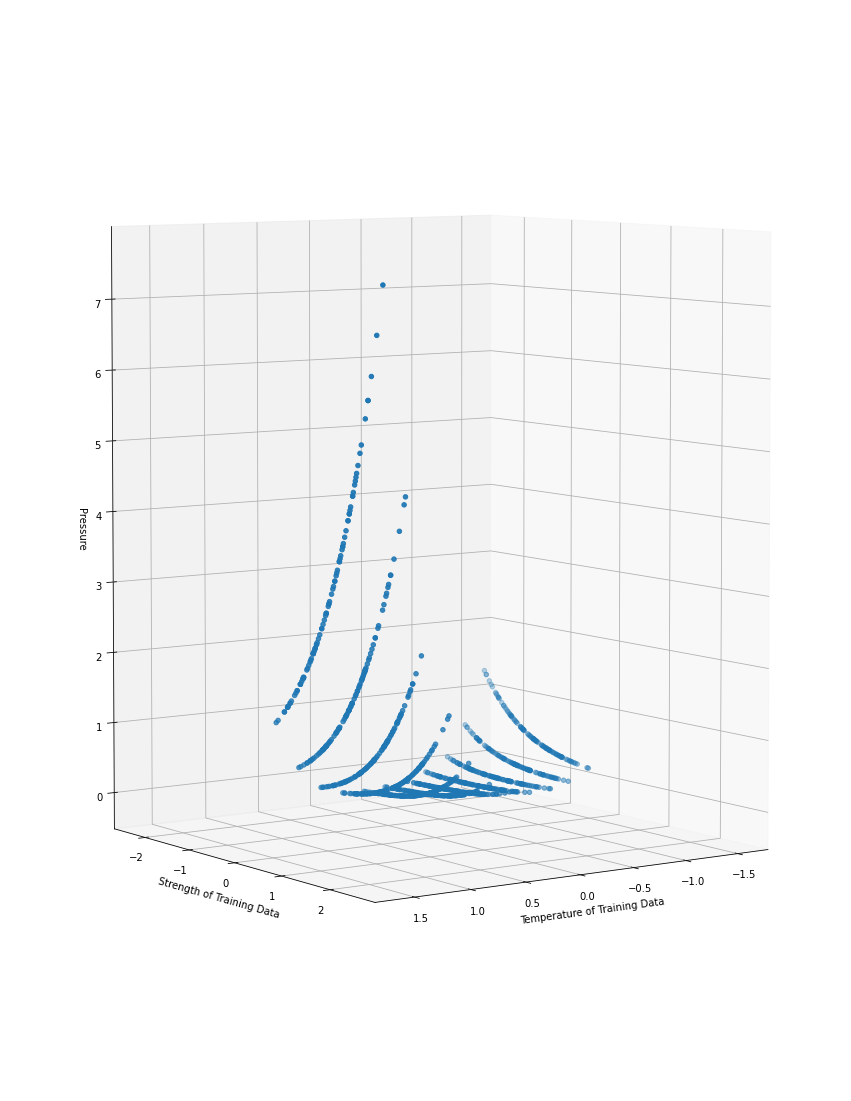

for polynomial of degree 5 in scatter plots for all points


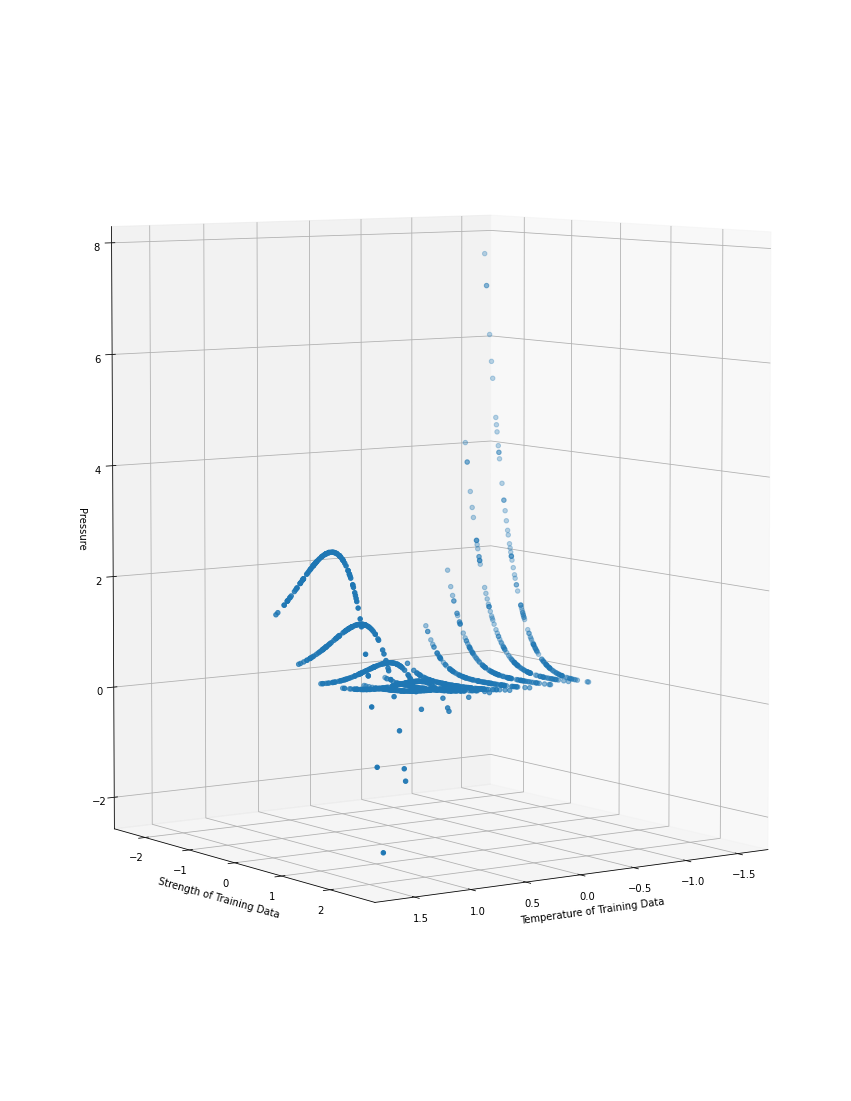

for polynomial of degree 6 in scatter plots for all points


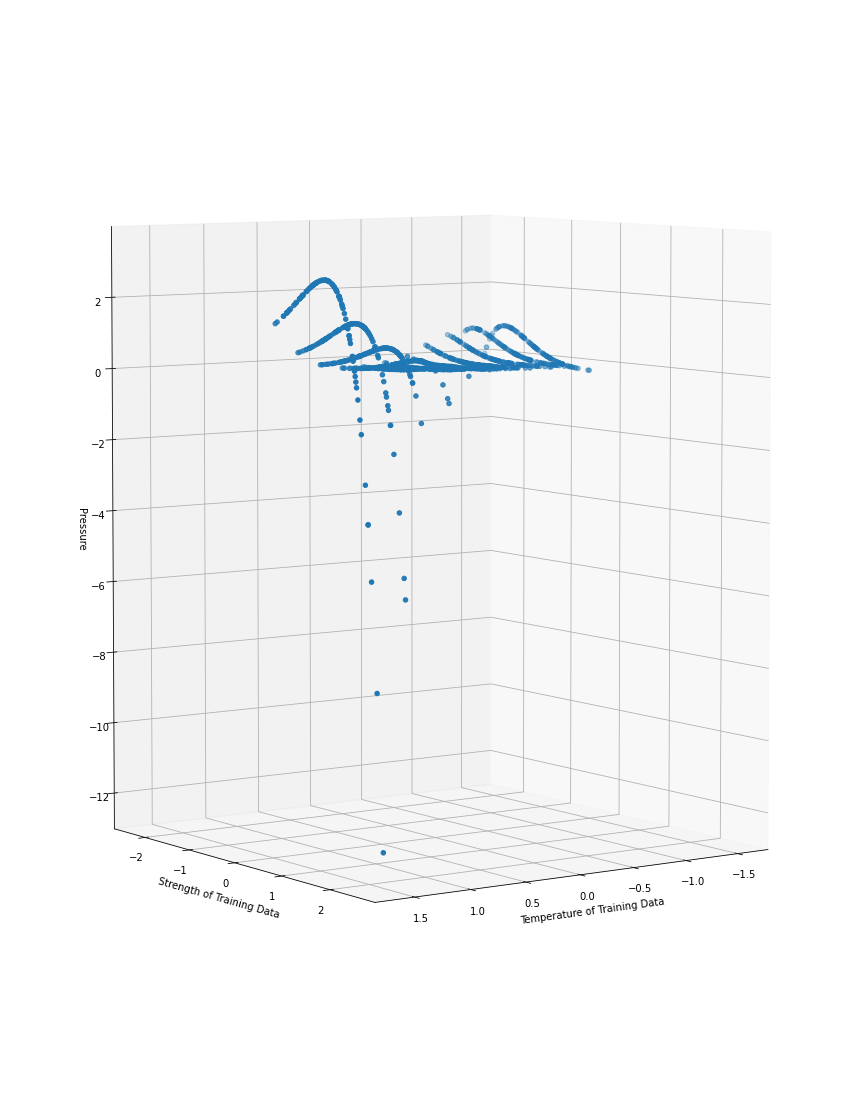

for polynomial of degree 7 in scatter plots for all points


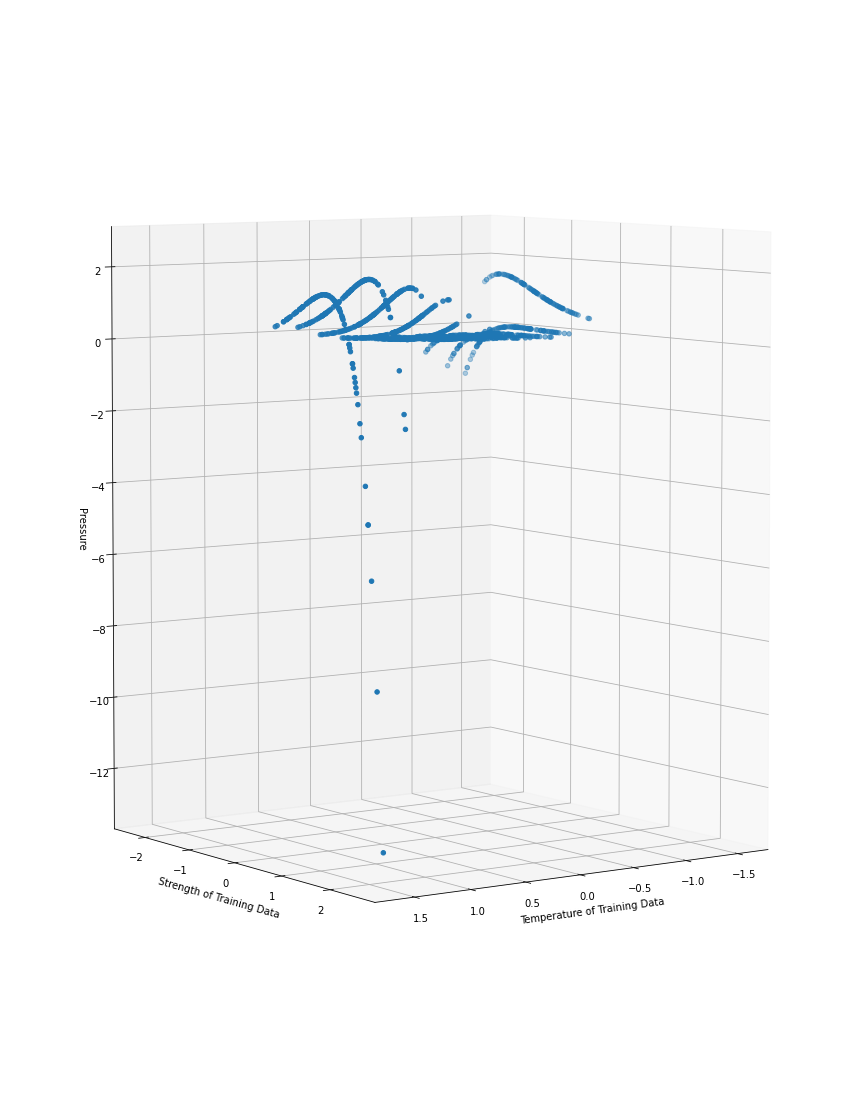

for polynomial of degree 8 in scatter plots for all points


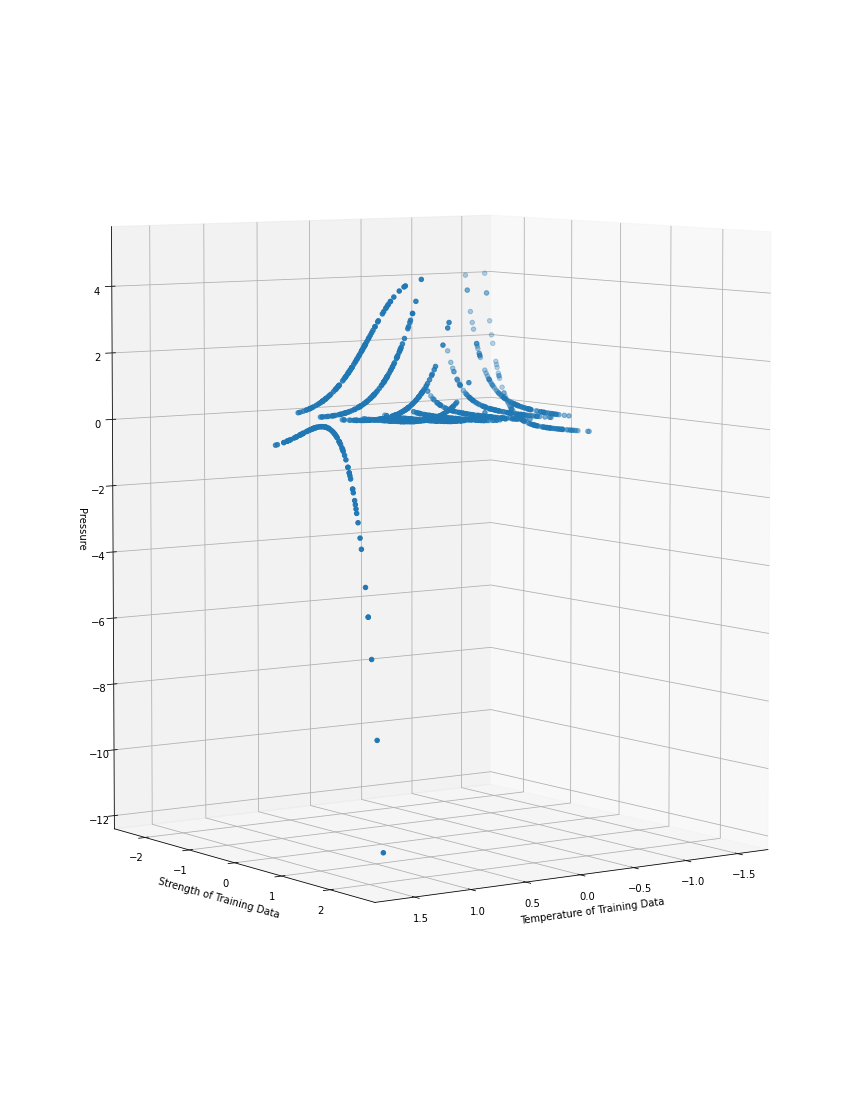

for polynomial of degree 9 in scatter plots for all points


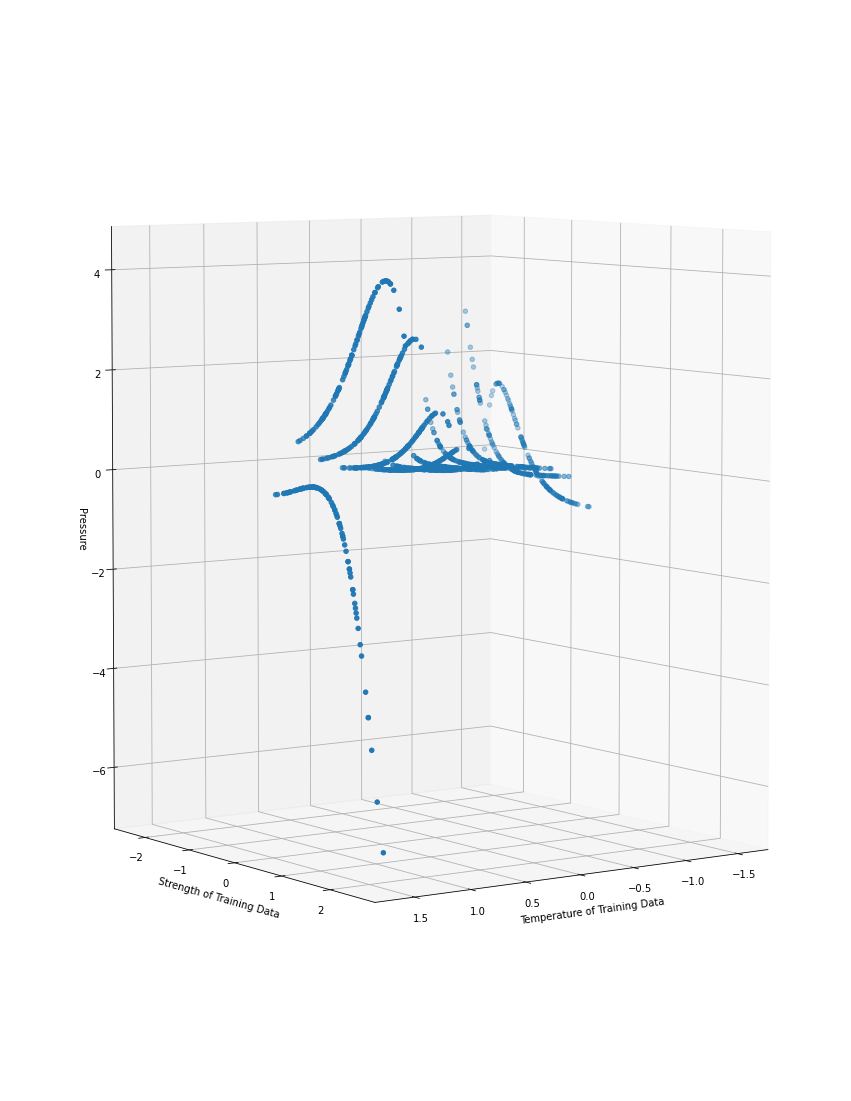

In [ ]:
#now plotting scatter plots for all

for x in range(1,10):
    print('for polynomial of degree '+str(x)+' in scatter plots for all points')
    u=round(((x+1)+(x+1)*(x+1))/2)
    arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array

    omega_arr=np.array(omegas[x-1]).reshape(u,1)
    
    degrees_x_axis[x-1]=x
    
    #now calculating y from predicted values of omeagas of SDA
    temp_ones=np.ones([1,x1_s_tr.size])
    
    y_pred=np.zeros([1,x1_s_tr.size])
    
    for j in range(u):
        x1_c=arr[j][0]
        x2_c=arr[j][1]
        temp_x1=np.ones([1,x1_s_tr.size])
        temp_x2=np.ones([1,x1_s_tr.size])
        for k in range(x1_c):
            temp_x1=np.multiply(temp_x1,x1_s_tr)                
        for k in range(x2_c):
            temp_x2=np.multiply(temp_x2,x2_s_tr)
        ans=np.multiply(temp_x1,temp_x2)
        ans=np.multiply(ans,omega_arr[j])
        y_pred+=ans
    
    def plotter(E,A):
      fig=plt.figure(figsize=[15,20])
      ax = plt.axes(projection='3d')
      ax.scatter3D(x1_s_tr,x2_s_tr , y_pred,cmap="prism_r");
      ax.view_init(elev=E,azim=A)
      ax.set_xlabel('Temperature of Training Data')
      ax.set_ylabel('Strength of Training Data')
      ax.set_zlabel('Pressure')
      plt.show()

    plotter(5,55)#put diffenrent values for elevation and azimuthal for plotting

B)Using the same dataset, construct polynomial regression of degree 9 and implement ridge
and lasso regression with gradient descent and stochastic gradient algorithms. Build both 
the models with for different values of lambda (at least 20values) and figure out the optimal 
models with the most appropriate lambda

In [ ]:
finlist=[] #this lists of list contains various powers of x for different order polynomials
templist=[] #used for storing current modified state

lamb=[math.exp(-8),math.exp(-7.5),math.exp(-7),math.exp(-6.5),math.exp(-6),math.exp(-5.75),math.exp(-5.5),math.exp(-5.25),math.exp(-5),math.exp(-4.75),math.exp(-4.5),math.exp(-4.25),math.exp(-4),math.exp(-3.75),math.exp(-3.5),math.exp(-3.25),math.exp(-3),math.exp(-2),math.exp(-1),math.exp(-0.5)]
weight=[]
for b in range (len(lamb)):
    
    for x in range(0,10):
        for i in range(x+1):
            for j in range(x+1):
                if i+j<=x:
                    f=[j,i]
                    templist.append(f)
        finlist.append(templist)
        templist=[]


#finlist[0:9] contains all possible powers for x
#now gradient desent starts
#for degree zero we have fixed y


#now doing the GDA for degree 1 to 9
    for x in range(9,10): #degree of polynomial being made
        u=round(((x+1)+(x+1)*(x+1))/2)
        #print(u)
        #print('\n')
        t=0
        arr=np.array(finlist[x]).reshape(u,2)
        #print(arr)
        wk=np.zeros([u,1])
    
        #initial values taken as 0.1
        for i in range(0,u):
            wk[i]=0.1
        lr=0.0001 #this is neta value or learning rate

        #now GDA begins creating error matrix to minimize
        #print(wk)
        print('entering loop ')
        e_arr=np.zeros([u,1])
        for h in range(1000):#no of iterations necessary
            for i in range(0,u):
                ansf=np.zeros([1,x1_s_tr.size])
                for j in range(0,u):
                    x1_c=arr[j][0]
                    x2_c=arr[j][1]
                    #print('x1 count in j= '+str(j)+' is '+str(x1_c))
                    #print('x2 count in j= '+str(j)+' is '+str(x2_c))
                    temp_x1=np.ones([1,x1_s_tr.size])
                    temp_x2=np.ones([1,x2_s_tr.size])
                    for k in range(x1_c):
                        temp_x1=np.multiply(temp_x1,x1_s_tr)                
                    for k in range(x2_c):
                        temp_x2=np.multiply(temp_x2,x2_s_tr)
                    ans=np.multiply(temp_x1,temp_x2)
                    ans=np.multiply(ans,wk[j])
                    #print('now printing ans'+'\n',ans)
                    #print(temp_x1)
                    #print(temp_x2)
                    #print('\n')
                    ansf+=ans
                    #print('i= '+str(i))
                    #print('j= '+str(j)+' '+str(e_arr[i]))
                ansf=ansf-y_s_tr
            
                x1_c=arr[i][0]
                x2_c=arr[i][1]
                temp_x1=np.ones([1,x1_s_tr.size])
                temp_x2=np.ones([1,x2_s_tr.size])
                for k in range(x1_c):
                    temp_x1=np.multiply(temp_x1,x1_s_tr)                
                for k in range(x2_c):
                    temp_x2=np.multiply(temp_x2,x2_s_tr)
                ansf=np.multiply(ansf,temp_x1)
                ansf=np.multiply(ansf,temp_x2)
                ansf=np.multiply(lr,ansf)
                #print(ansf)
                e_arr[i]=lr*(ansf.sum())+lamb[b]*wk[i]
            
            wk-=e_arr
            #if h%10==0:
            #print('\n')
            #print('for h '+str(h))
            #print(wk)
        
        print('this one is for x= '+str(x))
        print(wk)
        weight.append(wk)
        print('\n')

In [ ]:
ridge_train_error=[]
ridge_test_error=[]
for i in range(len(lamb)):
    for x in range(9,10):
        print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm training error (RMSE) is as follows')
        u=round(((x+1)+(x+1)*(x+1))/2)
        arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
        omega_arr=np.array(weight[i]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
        temp_ones=np.ones([1,x1_s_tr.size])
        y_pred=np.zeros([1,x1_s_tr.size])
        for j in range(u):
            x1_c=arr[j][0]
            x2_c=arr[j][1]
            temp_x1=np.ones([1,x1_s_tr.size])
            temp_x2=np.ones([1,x2_s_tr.size])
            for k in range(x1_c):
                temp_x1=np.multiply(temp_x1,x1_s_tr)                
            for k in range(x2_c):
                temp_x2=np.multiply(temp_x2,x2_s_tr)
            ans=np.multiply(temp_x1,temp_x2)
            ans=np.multiply(ans,omega_arr[j])
            y_pred+=ans
        msee=MSE(y_s_tr,y_pred)+lamb[i]*np.sum(weight[i]*weight[i])
        msee=math.sqrt(msee)
        print(msee)
        ridge_train_error.append(msee)
        y_training[x-1]=msee
    
        print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm testing error (RMSE) is as follows')
        u=round(((x+1)+(x+1)*(x+1))/2)
        arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
    
        omega_arr=np.array(weight[i]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
        temp_ones=np.ones([1,x1_s_ts.size])
        y_pred=np.zeros([1,x1_s_ts.size])
        for j in range(u):
            x1_c=arr[j][0]
            x2_c=arr[j][1]
            temp_x1=np.ones([1,x1_s_ts.size])
            temp_x2=np.ones([1,x2_s_ts.size])
            for k in range(x1_c):
                temp_x1=np.multiply(temp_x1,x1_s_ts)                
            for k in range(x2_c):
                temp_x2=np.multiply(temp_x2,x2_s_ts)
            ans=np.multiply(temp_x1,temp_x2)
            ans=np.multiply(ans,omega_arr[j])
            y_pred+=ans
        msee=MSE(y_s_ts,y_pred)+lamb[i]*np.sum(weight[i]*weight[i])
        msee=math.sqrt(msee)
        print(msee)
        ridge_test_error.append(msee)
        y_testing[x-1]=msee
    
        print('\n')

In [ ]:
plt.plot(np.log(lamb),ridge_train_error,label="Training error")
plt.plot(np.log(lamb),ridge_test_error,label="Testing error")
plt.xlabel("Log of Lambda")
plt.ylabel("Mean Square Error")
plt.legend(loc="lower left")
plt.ylim([0.9,1.25])

In [ ]:
finlist=[] #this lists of list contains various powers of x for different order polynomials
templist=[] #used for storing current modified state
lamb=[math.exp(-50),math.exp(-40),math.exp(-30),math.exp(-10),math.exp(-8),math.exp(-5.75),math.exp(-5.5),math.exp(-5.25),math.exp(-5),math.exp(-4.75),math.exp(-4.5),math.exp(-4.25),math.exp(-4),math.exp(-3.75),math.exp(-3.5),math.exp(-3.25),math.exp(-3),math.exp(-2),math.exp(-1),math.exp(-0.5)]
weight=[]
for b in range (20):
    
  
#finlist[0:9] contains all possible powers for x
#now gradient desent starts
#for degree zero we have fixed y


#now doing the GDA for degree 1 to 9
    for x in range(9,10): #degree of polynomial being made
        u=round(((x+1)+(x+1)*(x+1))/2)
        #print(u)
        #print('\n')
        t=0
        arr=np.array(finlist[x]).reshape(u,2)
        #print(arr)
        wk=np.zeros([u,1])
    
        #initial values taken as 0.1
        for i in range(0,u):
            wk[i]=0.1
        lr=0.0001 #this is neta value or learning rate

        #now GDA begins creating error matrix to minimize
        #print(wk)
        print('entering loop ')
        e_arr=np.zeros([u,1])
        for h in range(1000):#no of iterations necessary
            for i in range(0,u):
                ansf=np.zeros([1,x1_s_tr.size])
                for j in range(0,u):
                    x1_c=arr[j][0]
                    x2_c=arr[j][1]
                    #print('x1 count in j= '+str(j)+' is '+str(x1_c))
                    #print('x2 count in j= '+str(j)+' is '+str(x2_c))
                    temp_x1=np.ones([1,x1_s_tr.size])
                    temp_x2=np.ones([1,x2_s_tr.size])
                    for k in range(x1_c):
                        temp_x1=np.multiply(temp_x1,x1_s_tr)                
                    for k in range(x2_c):
                        temp_x2=np.multiply(temp_x2,x2_s_tr)
                    ans=np.multiply(temp_x1,temp_x2)
                    ans=np.multiply(ans,wk[j])
                    #print('now printing ans'+'\n',ans)
                    #print(temp_x1)
                    #print(temp_x2)
                    #print('\n')
                    ansf+=ans
                    #print('i= '+str(i))
                    #print('j= '+str(j)+' '+str(e_arr[i]))
                ansf=ansf-y_s_tr
            
                x1_c=arr[i][0]
                x2_c=arr[i][1]
                temp_x1=np.ones([1,x1_s_tr.size])
                temp_x2=np.ones([1,x2_s_tr.size])
                for k in range(x1_c):
                    temp_x1=np.multiply(temp_x1,x1_s_tr)                
                for k in range(x2_c):
                    temp_x2=np.multiply(temp_x2,x2_s_tr)
                ansf=np.multiply(ansf,temp_x1)
                ansf=np.multiply(ansf,temp_x2)
                ansf=np.multiply(lr,ansf)
                #print(ansf)
                e_arr[i]=lr*(ansf.sum())+lamb[b]
            
            wk-=e_arr
            #if h%10==0:
            #print('\n')
            #print('for h '+str(h))
            #print(wk)
        
        print('this one is for x= '+str(x))
        print(wk)
        weight.append(wk)
        print('\n')

In [ ]:
laso_train_error=[]
laso_test_error=[]
for i in range(20):
    for x in range(9,10):
        print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm training error (RMSE) is as follows')
        u=round(((x+1)+(x+1)*(x+1))/2)
        arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
        omega_arr=np.array(weight[i]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
        temp_ones=np.ones([1,x1_s_tr.size])
        y_pred=np.zeros([1,x1_s_tr.size])
        for j in range(u):
            x1_c=arr[j][0]
            x2_c=arr[j][1]
            temp_x1=np.ones([1,x1_s_tr.size])
            temp_x2=np.ones([1,x2_s_tr.size])
            for k in range(x1_c):
                temp_x1=np.multiply(temp_x1,x1_s_tr)                
            for k in range(x2_c):
                temp_x2=np.multiply(temp_x2,x2_s_tr)
            ans=np.multiply(temp_x1,temp_x2)
            ans=np.multiply(ans,omega_arr[j])
            y_pred+=ans
        msee=MSE(y_s_tr,y_pred)+lamb[i]*np.sum(weight[i])
        msee=math.sqrt(msee)
        print(msee)
        laso_train_error.append(msee)
        y_training[x-1]=msee
    
        print('for polynomial of degree '+str(x)+' Gradient Descent Algorithm testing error (RMSE) is as follows')
        u=round(((x+1)+(x+1)*(x+1))/2)
        arr=np.array(finlist[x]).reshape(u,2) #this is our corresponding powers of x1 and x2 array
    
        omega_arr=np.array(weight[i]).reshape(u,1)
    
    #now calculating y from predicted values of omeagas
        temp_ones=np.ones([1,x1_s_ts.size])
        y_pred=np.zeros([1,x1_s_ts.size])
        for j in range(u):
            x1_c=arr[j][0]
            x2_c=arr[j][1]
            temp_x1=np.ones([1,x1_s_ts.size])
            temp_x2=np.ones([1,x2_s_ts.size])
            for k in range(x1_c):
                temp_x1=np.multiply(temp_x1,x1_s_ts)                
            for k in range(x2_c):
                temp_x2=np.multiply(temp_x2,x2_s_ts)
            ans=np.multiply(temp_x1,temp_x2)
            ans=np.multiply(ans,omega_arr[j])
            y_pred+=ans
        msee=MSE(y_s_ts,y_pred)+lamb[i]*np.sum(weight[i])
        msee=math.sqrt(msee)
        print(msee)
        laso_test_error.append(msee)
        y_testing[x-1]=msee
    
        print('\n')
    

In [ ]:
plt.plot(np.log(lamb),laso_train_error,label="Training error")
plt.plot(np.log(lamb),laso_test_error,label="Testing error")
plt.xlabel("Log of Lambda")
plt.ylabel("Mean Square Error")
plt.ylim([0.75,2.5])
plt.legend()

## **THE END**